<a href="https://colab.research.google.com/github/ranicah/CapstoneProject2/blob/main/Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS POLA PERJALANAN PENUMPANG TRANSJAKARTA

Melihat pola perjalanan penumpang dari koridor/halte tempat mereka tap masuk dan keluar dan menganalisis waktu sibuk dalam satu minggu

## INTRODUCTION

# ABSTRAK

Pengukuran kinerja transportasi menjadi suatu hal penting dalam menganalisis seberapa cepat dan efisien sebuah transportasi mengantarkan penumpang dari satu tujuan ke tujuan akhir. Salah satu transportasi yang banyak diminati oleh masyarakat DKI Jakarta adalah Transjakarta. Transportasi dalam kota yang menyajikan perjalanan dari rute-rute dalam waktu 24 jam non-stop.

# BACKGROUND

TransJakarta adalah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan dengan jalur lintasan terpanjang di dunia (208 km). Sistem BRT ini didesain berdasarkan sistem TransMilenio di Bogota, Kolombia. Terhitung sejak 1 Februari 2004, TransJakarta resmi beroperasi.

# PROBLEM

Perusahaan ingin tahu mengenai:
1. Koridor dan halte yang memiliki jumlah penumpang terbanyak
2. Hari dan pukul berapa padat penumpang
3. Kategori umur penumpang

# TUJUAN

1. Mengetahui kepadatan penumpang perhari untuk mengevaluasi jumlah armada bus yang beroperasi
2. Mengetahui kategori penumpang Transjakarta guna meningkatkan kenyamanan penumpang
3. Aksi berkelanjutan untuk kepuasan penumpang Transjakarta

# BATASAN MASALAH

1. Menggunakan data di bulan April 2023
2. Informasi tambahan berasal dari internet dan website Transjakarta

# SUMBER DATA

https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo

# IMPORT LIBRARIES

In [ ]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For more interesting data visualization
import missingno as msno # For identifying and visualizing missing data
from datetime import datetime # For date manipulation
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import kruskal

# DATA UNDERSTANDING

### INPUT DATA

Menginput dataset yang telah disediakan ke dalam colab

In [ ]:
data = pd.read_csv("Transjakarta.csv")
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


### MELIHAT KOLOM

Melihat kolom untuk mengetahui panjang dan nama kolom

In [ ]:
data.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [ ]:
#banyak kolom
len(data.columns)

22

Terdapat 22 kolom asli dataset

### PENJELASAN KOLOM

transID: ID transaksi yang unik untuk setiap transaksi.

payCardID: Identifikasi utama dari pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.

payCardBank: Nama bank penerbit kartu pembayaran milik pelanggan.

payCardName: Nama pelanggan yang ada di kartu.

payCardSex: Jenis kelamin pelanggan yang ada di kartu.

payCardBirthDate: Tahun kelahiran pelanggan.

corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.

corridorName: Nama Koridor / Nama Rute berisi Mulai dan Selesai untuk setiap rute.

direction: Arah rute. 0 untuk Pergi, 1 untuk Pulang.

tapInStops: ID halte tempat pelanggan melakukan Tap Masuk.

tapInStopsName: Nama halte tempat pelanggan melakukan Tap Masuk.

tapInStopsLat: Garis lintang dari halte tempat pelanggan melakukan Tap Masuk.

tapInStopsLon: Garis bujur dari halte tempat pelanggan melakukan Tap Masuk.

stopStartSeq: Posisi halte awal dalam rute perjalanan pelanggan pada saat melakukan Tap Masuk.

tapInTime: Waktu pelanggan melakukan Tap Masuk yang mencakup tanggal dan jam.

tapOutStops: ID halte tempat pelanggan melakukan Tap Keluar.

tapOutStopsName: Nama halte tempat pelanggan melakukan Tap Keluar.

tapOutStopsLat: Garis lintang dari halte tempat pelanggan melakukan Tap Keluar.

tapOutStopsLon: Garis bujur dari halte tempat pelanggan melakukan Tap Keluar.

stopEndSeq: Posisi halte akhir dalam rute perjalanan pelanggan pada saat melakukan Tap Keluar.

tapOutTime: Waktu pelanggan melakukan Tap Keluar yang mencakup tanggal dan jam.

payAmount: Jumlah yang dibayarkan pelanggan. Beberapa gratis. Beberapa berbayar.


### INFORMASI DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

**tapInTime dan tapOutTime** masih berbentuk objek/kategorik, nantinya akan **diubah menjadi datettime**

### MISSING VALUE

Melihat apakah terdapat missing value dalam dataset

In [ ]:
# Melihat total missing value
data1 = data.isna().sum()
data1

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,1257
corridorName,1930
direction,0
tapInStops,1213


In [ ]:
dataframe = pd.DataFrame(data = data1)

In [ ]:
data1.name = "Jumlah Missing Value"
data1

,Jumlah Missing Value
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,1257
corridorName,1930
direction,0
tapInStops,1213


In [ ]:
#Menghitung missing value dalam bentuk persentase

dataframe = pd.DataFrame(data = data1)
dataframe["Persentase"] = round(dataframe["Jumlah Missing Value"] / len(data) * 100,2)

In [ ]:
dataframe.sort_values(by="Jumlah Missing Value",ascending=False)

,Jumlah Missing Value,Persentase
tapOutStops,2289,6.04
corridorName,1930,5.09
tapOutStopsLat,1344,3.55
stopEndSeq,1344,3.55
tapOutTime,1344,3.55
tapOutStopsLon,1344,3.55
tapOutStopsName,1344,3.55
corridorID,1257,3.32
tapInStops,1213,3.20
payAmount,1007,2.66


In [ ]:
print(dataframe["Persentase"].sum()) #Jumlah % Missing Value

38.06


Total missing value sebanyak 38.06%

### DATA POSISI DAN INDEX POSISI DATA MISSING

Melihat lebih detail letak dari missing value

<Axes: >

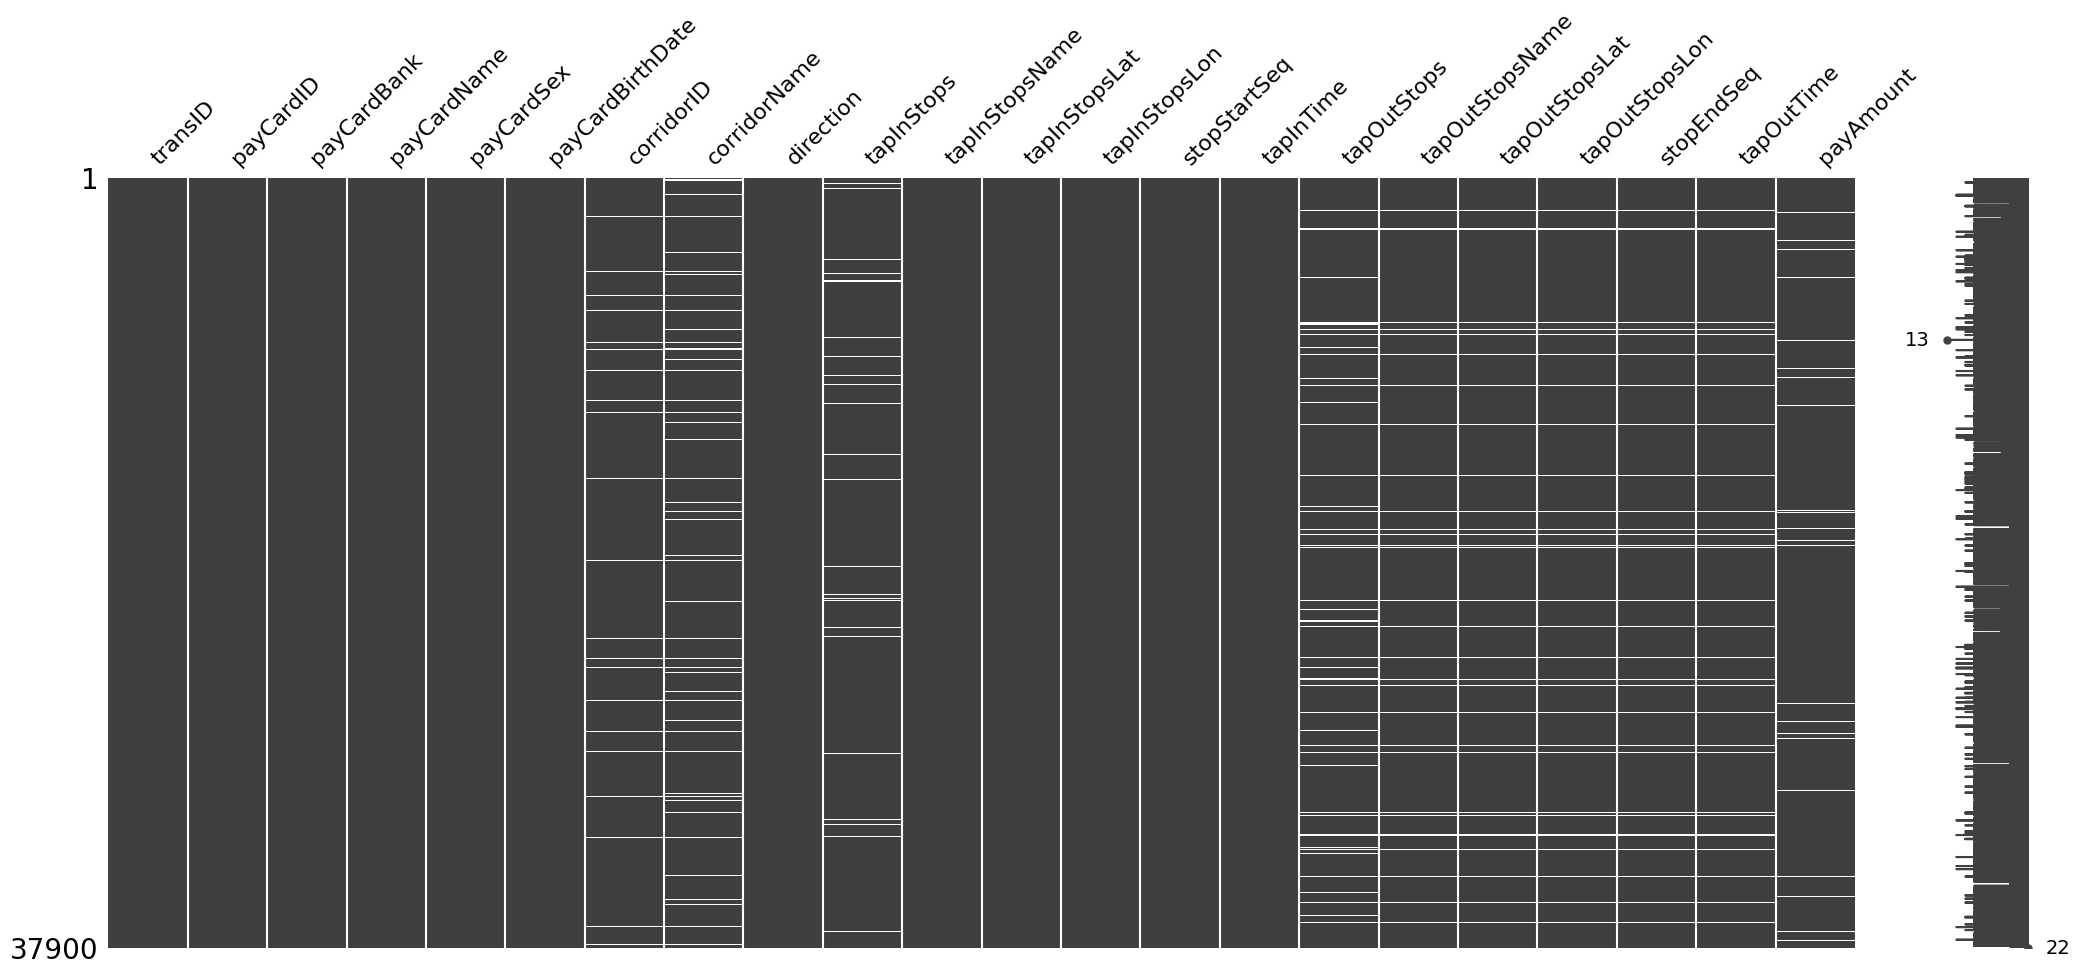

In [ ]:
# Mengetahui posisi missing value

msno.matrix(data)

In [ ]:
#melihat posisi data missing
data[data.isna().any(axis=1)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,Lippo Mall Kramat Jati,-6.270835,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,Mega Cinere,-6.333340,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37882,YMCL988A7J02QF,180074952289665,emoney,Asmadi Setiawan,F,1971,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B01732P,Jatinegara Timur,-6.220486,106.86825,11,2023-04-30 08:41:09,B01169P,Jln. Jatinegara Timur IV,-6.222457,106.86816,13.0,2023-04-30 10:07:19,NaN
37885,KUXY021D6I25YN,30169751274025,bni,Prasetya Wasita,M,1986,3B,NaN,1.0,B04610P,Sekolah Al Huda 1,-6.149731,106.72736,2,2023-04-08 10:46:06,B00192P,BSI Cengkareng,-6.147973,106.72781,3.0,2023-04-08 13:06:42,0.0
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-04 14:52:31,NaN,Pramuka LIA,-6.192238,106.86858,9.0,2023-04-04 15:38:58,3500.0


##### APAKAH MISSING VALUE DAPAT DISIMPAN ATAU DIHAPUS?

Mengecek apakah data yang hilang disimpan atau dapat dihapus. Salah satu contoh berada di index ke-89

In [ ]:
data[data['transID'] == 'QMHC825R0K38KM']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
89,QMHC825R0K38KM,3537543297101185,dki,Samsul Ramadan,M,1966,M11,NaN,1.0,P00158,Pasar Pulo Gadung,-6.187434,106.90591,0,2023-04-03 06:23:36,NaN,Walikota Jakarta Timur,-6.21254,106.94537,7.0,2023-04-03 06:52:14,3500.0


corridorName merupakan missing value, akan tetapi dapat diisi dari corridorID. Begitu pula untuk tapOutStops dapat diisi dari tapOutStopsName

### DATA DUPLICATED

In [ ]:
# Melihat data duplikat

data.duplicated().sum()

np.int64(0)

Kesimpulan: tidak ada data duplikat

## EXPLORATORY DATA ANALYSIS (EDA)

### Numerical Variable

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

#### Quick Summary of Descriptive Statistics

In [ ]:
data.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


#### Korelasi

In [ ]:
data.select_dtypes(include="number").corr() # kolom kategorik

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
payCardID,1.000000,0.000939,0.000839,-0.014416,-0.035232,-0.027670,-0.007771,-0.032021,-0.045616,0.061040
payCardBirthDate,0.000939,1.000000,0.001615,0.061717,-0.033932,-0.025739,0.039884,-0.033193,-0.028652,0.066837
direction,0.000839,0.001615,1.000000,0.002996,-0.007578,-0.051265,-0.058007,0.045972,-0.044204,0.001040
tapInStopsLat,-0.014416,0.061717,0.002996,1.000000,0.026214,-0.001103,0.899224,0.033296,-0.012108,-0.124661
tapInStopsLon,-0.035232,-0.033932,-0.007578,0.026214,1.000000,0.043186,0.035634,0.892529,0.080392,-0.190337
stopStartSeq,-0.027670,-0.025739,-0.051265,-0.001103,0.043186,1.000000,-0.017807,0.037464,0.825642,-0.250072
tapOutStopsLat,-0.007771,0.039884,-0.058007,0.899224,0.035634,-0.017807,1.000000,0.016244,-0.025369,-0.141596
tapOutStopsLon,-0.032021,-0.033193,0.045972,0.033296,0.892529,0.037464,0.016244,1.000000,0.073888,-0.191884
stopEndSeq,-0.045616,-0.028652,-0.044204,-0.012108,0.080392,0.825642,-0.025369,0.073888,1.000000,-0.323909
payAmount,0.061040,0.066837,0.001040,-0.124661,-0.190337,-0.250072,-0.141596,-0.191884,-0.323909,1.000000


### DESCRIPTIVE STATISTICS

### GRAFIK HISTOGRAM

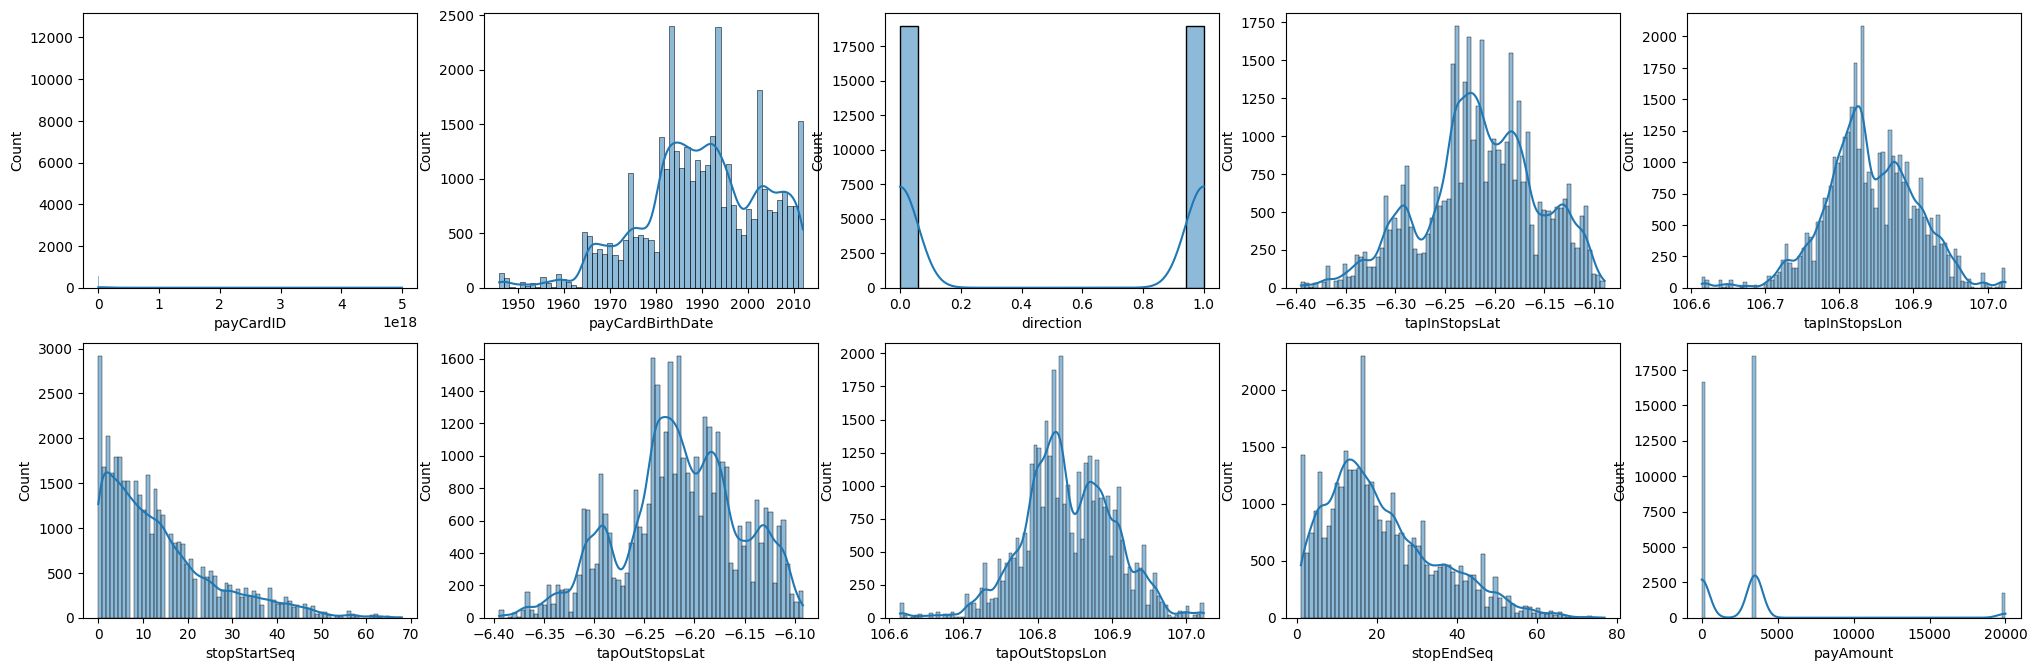

In [ ]:
hist_numeric = data.select_dtypes(include = 'number')

plt.figure(figsize = (25,25)) # (column, row)
posisi = 1
for kolom in hist_numeric.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.histplot(data[kolom], kde = True)
    posisi += 1

# print graph
plt.show()

### UJI STATISTIK

Melakukan uji statistik untuk melihat persebaran datanya apakah normal  atau tidak

In [ ]:
# Dilakukan penghapusan NaN / missing value untuk dapat menjalankan uji statistik

df_copy= data.copy()

# drop missing value
df_copy = df_copy.dropna()

In [ ]:
numeric_columns = df_copy.select_dtypes(include=[np.number]).columns

In [ ]:
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in hist_numeric:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(df_copy[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR payCardID:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.5314, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.3347, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 17629.5267, p-value: 0.0000 -> Not Normal


RESULTS FOR payCardBirthDate:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0521, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9763, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 876.4604, p-value: 0.0000 -> Not Normal


RESULTS FOR direction:


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31730.
  res = hypotest_fun_out(*samples, **kwds)


Kolmogorov-Smirnov - Statistic: 0.5000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.3416, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.6366, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 108385.9563, p-value: 0.0000 -> Not Normal


RESULTS FOR tapInStopsLat:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0512, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9881, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 479.8859, p-value: 0.0000 -> Not Normal


RESULTS FOR tapInStopsLon:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0452, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9923, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 325.0753, p-value: 0.0000 -> Not Normal


RESULTS FOR stopStartSeq:
Kolmogorov-Smirnov - Statistic: 0.8555, p-value: 0.0000 -> Not Normal
Liliefors Test - Statisti

Hasil keseluruhan menunjukkan data tersebut merupakan distribusi tidak normal karena pvalue < 0.05

### OUTLIERS

Melihat outliers yang ada dalam kolom

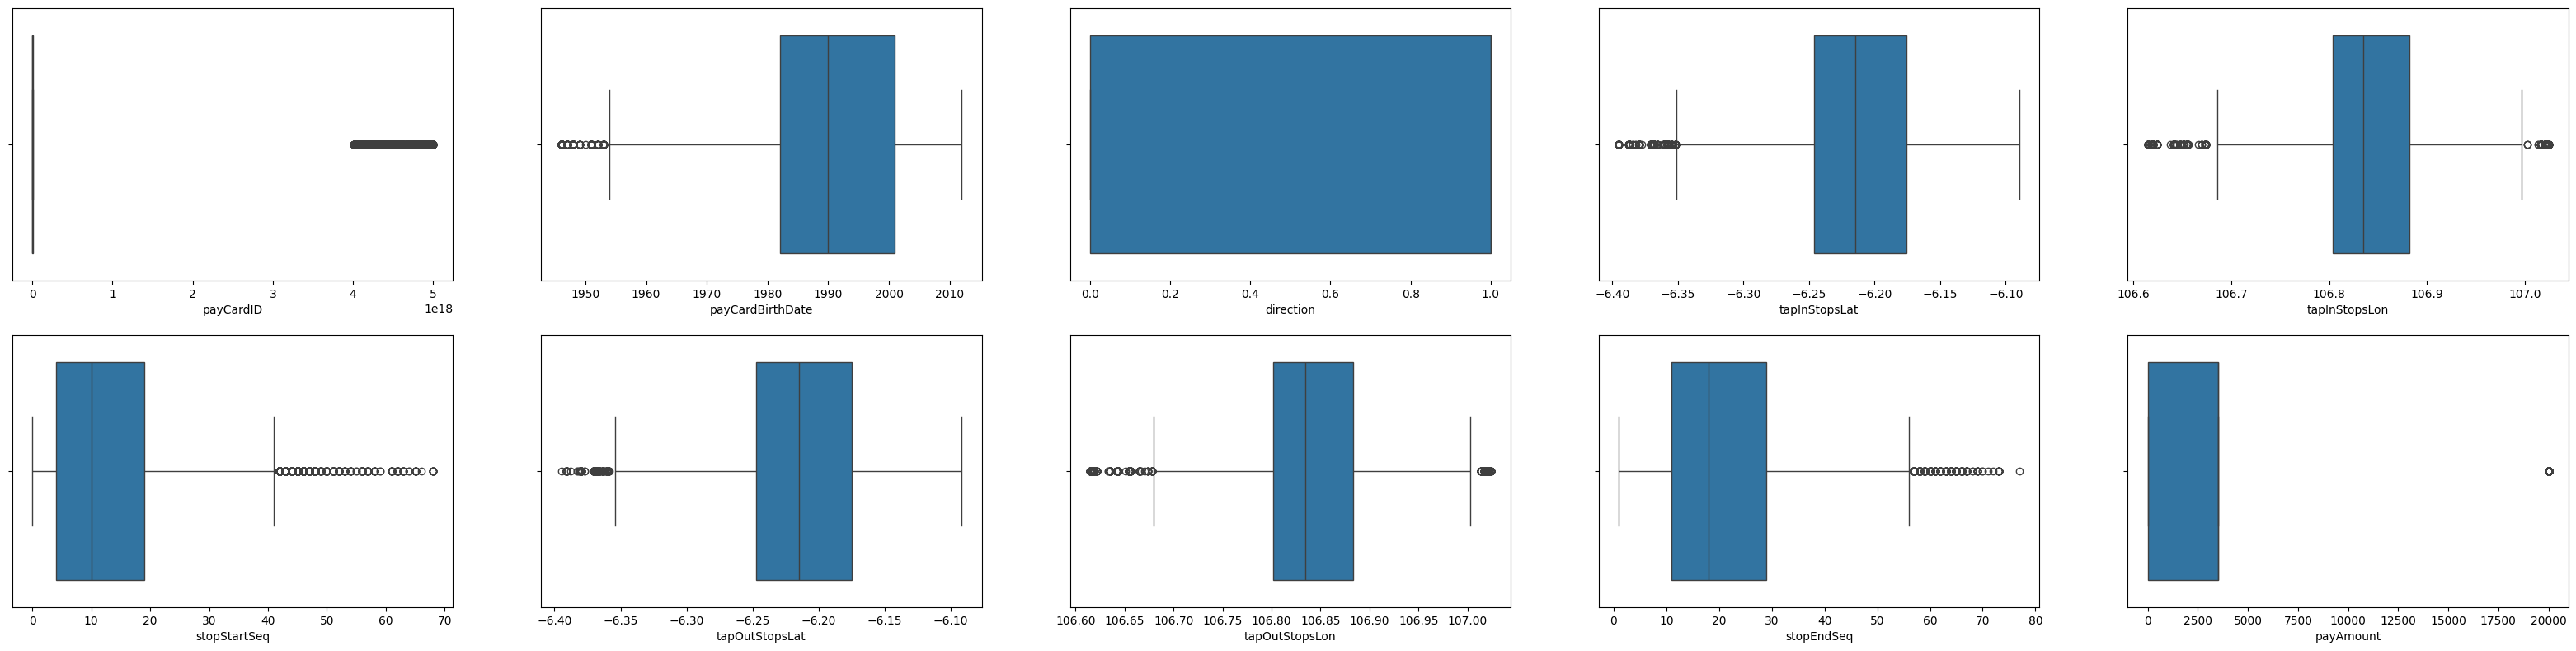

In [ ]:
hist_numeric = data.select_dtypes(include = 'number')

plt.figure(figsize = (40,30)) # (column, row)
posisi = 1
for kolom in hist_numeric.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.boxplot(x=data[kolom])
    posisi += 1

# print graph
plt.show()

#### IQR

In [ ]:
numeric_columns = data.select_dtypes(include='number')
list_outliers_count = []

for column in numeric_columns.columns:
    q3 = numeric_columns.describe().loc['75%', column]
    q1 = numeric_columns.describe().loc['25%', column]
    iqr = q3 - q1
    whisker = 1.5 * iqr
    upper_bound = q3 + whisker
    lower_bound = q1 - whisker

    # Count of outliers
    outliers_count = len(data[(data[column] > upper_bound) | (data[column] < lower_bound)])
    list_outliers_count.append(outliers_count)

outliers_data = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Outliers Count': list_outliers_count
})

In [ ]:
outliers_data_sorted = outliers_data.sort_values(by='Outliers Count', ascending=False)
outliers_data_sorted

,Column,Outliers Count
0,payCardID,3531
9,payAmount,1742
5,stopStartSeq,1543
8,stopEndSeq,583
4,tapInStopsLon,558
7,tapOutStopsLon,449
3,tapInStopsLat,411
6,tapOutStopsLat,359
1,payCardBirthDate,340
2,direction,0


Outlier yang ada pada perkolom dianalisis, apakah data yang tersimpang jauh tersebut berbeda dari data umumnya atau masih dapat diterima

#### OUTLIER DI payCardID

In [ ]:
data[data['payCardID'] >= 6*10^18]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [ ]:
data[data['payCardID'] >= 4*10^24]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


**Kesimpulan:**
payCardID merupakan kartu yang digunakan penumpang. Setiap penumpang memiliki CardID yang berbeda-beda, sehingga nilai Outlier dapat diterima

#### OUTLIER DI payAmount

In [ ]:
data[data['payAmount'] == 0]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.83787,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.83254,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,Lippo Mall Kramat Jati,-6.270835,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37891,XQDZ821C9G88JD,2712823212983860,dki,"drg. Maras Wibowo, S.Ked",F,1966,JAK.30,Grogol - Meruya via Roxy,1.0,B01209P,Jln. Kartika Meruya Selatan,-6.203099,106.73673,14,2023-04-19 16:31:09,B04071P,Sbr. Masjid Nurul Falah Grogol,-6.170757,106.78477,53.0,2023-04-19 19:13:53,0.0
37892,YHJT665I6G08OS,4775206940093,online,"Cahyo Sudiati, M.Farm",M,1979,JAK.52,Terminal Kalideres - Terminal Muara Angke,1.0,B01087P,Jln. Gunung Galunggung 1,-6.142286,106.73712,29,2023-04-28 16:38:56,B03207P,RSUD Cengkareng,-6.142238,106.73398,30.0,2023-04-28 18:35:16,0.0
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,MTsN 37,-6.097910,106.70237,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,Sbr. SMPN 252,-6.239289,106.94229,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0


In [ ]:
data[data['payAmount'] >= 20000]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,NaN,1.0,B00589P,GBK Pintu 7,-6.222095,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaN,20000.0
117,YTOA058V9U73VN,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,T21,Palem Semi - Bundaran Senayan,1.0,B00808P,Islamic,-6.228521,106.61473,10,2023-04-03 06:37:27,B02557P,Palem Semi 2,-6.220361,106.61649,12.0,2023-04-03 07:20:36,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37854,AMQA420I2P82KP,3553882732550120,dki,Siti Rahimah,M,1994,6P,Cibubur - Kuningan,1.0,B00596P,Gedung Granadi,-6.231311,106.83301,11,2023-04-03 17:56:55,B00226P,Buperta Cibubur,-6.370321,106.89628,18.0,2023-04-03 18:21:26,20000.0
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,Mega Cinere,-6.333340,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0
37879,LVSU593P5B50VF,30480183587078,bni,"Hj. Julia Nainggolan, M.Kom.",M,1990,S12,BSD Serpong - Fatmawati,1.0,B04581P,Sbr. Versailles,-6.308522,106.67339,3,2023-04-07 09:28:01,B05701P,Term. BSD,-6.306375,106.68536,4.0,2023-04-07 10:43:46,20000.0
37888,KWQA944F9O89IN,6585885975007109,dki,Hardana Gunarto,F,1982,B14,Bekasi Barat - Kuningan,0.0,B00664P,GOR Sumantri 2,-6.221038,106.83189,11,2023-04-05 09:30:00,B02411P,Menara Duta,-6.208617,106.82986,14.0,2023-04-05 11:58:54,20000.0


**Kesimpulan:**
Outlier dalam payAmount masih dapat diterima karena total pembayaran hanya 0, 3500, dan 20000

#### OUTLIER DI stopStartSeq

Melihat oulier di stopStartSeq dan stopEndSeq lebih detail

In [ ]:
data.loc[data['stopStartSeq'] >= 10, ['stopStartSeq','stopEndSeq']]

,stopStartSeq,stopEndSeq
1,13,21.0
2,38,39.0
3,23,29.0
6,25,NaN
9,15,24.0
...,...,...
37892,29,30.0
37893,39,42.0
37894,27,35.0
37897,12,14.0


In [ ]:
data.loc[data['stopStartSeq'] >= 30, ['stopStartSeq','stopEndSeq']]

,stopStartSeq,stopEndSeq
2,38,39.0
40,41,50.0
53,40,41.0
62,45,47.0
99,48,49.0
...,...,...
37868,39,40.0
37875,30,33.0
37890,32,33.0
37893,39,42.0


In [ ]:
data.loc[data['stopStartSeq'] >= 50, ['stopStartSeq','stopEndSeq']]

,stopStartSeq,stopEndSeq
230,52,56.0
235,56,57.0
285,50,53.0
550,61,67.0
830,52,56.0
...,...,...
37592,56,58.0
37634,50,52.0
37775,68,70.0
37797,59,61.0


In [ ]:
data.loc[data['stopStartSeq'] >= 68, ['stopStartSeq','stopEndSeq']]

,stopStartSeq,stopEndSeq
35046,68,69.0
35446,68,69.0
35846,68,69.0
36246,68,69.0
36646,68,69.0
37046,68,69.0
37446,68,69.0
37775,68,70.0


**Kesimpulan:**
stopStartSeq dan stopEndSeq saling berhubungan. stopStartSeq merupakan posisi halte awal dari pelanggan, sehingga nilai outlier tersebut dapat diterima.

#### OUTLIER DI stopEndSeq

In [ ]:
data.loc[data['stopEndSeq'] <= 50, ['stopStartSeq','stopEndSeq']]

,stopStartSeq,stopEndSeq
0,7,12.0
1,13,21.0
2,38,39.0
3,23,29.0
4,5,15.0
...,...,...
37895,2,13.0
37896,1,2.0
37897,12,14.0
37898,33,34.0


In [ ]:
data.loc[data['stopEndSeq'] >= 77, ['stopStartSeq','stopEndSeq']]

,stopStartSeq,stopEndSeq
37826,58,77.0


**Kesimpulan:**
Sama halnya dengan stopStartSeq, pemberhentian terakhir berada di posisi 77, sehingga nilai Outlier tersebut masih dapat diterima

#### OUTLIER DI tapInStopsLon

In [ ]:
data[data['tapInStopsLon'] >= 106]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [ ]:
data[data['tapInStopsLon'] >= 107]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
68,XESL868N6A66XN,373945281501952,emoney,"Jamal Pudjiastuti, S.I.Kom",F,1981,B21,Bekasi Timur - Cawang,1.0,B02263P,Masjid Amar Maruf 2,-6.255062,107.02206,7,2023-04-03 05:02:15,B05622P,Taman Margahayu 2,-6.248460,107.021530,10.0,2023-04-03 05:57:31,3500.0
137,AVII375J2K62NB,4966489323202,online,Eka Yolanda,M,1998,B21,Bekasi Timur - Cawang,1.0,B05560P,Superindo Bulak Kapal 2,-6.249488,107.02384,9,2023-04-03 05:34:50,B05622P,Taman Margahayu 2,-6.248460,107.021530,10.0,2023-04-03 05:58:34,3500.0
246,YOSA780P4S21GA,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,B21,Bekasi Timur - Cawang,0.0,B05768P,Tol Bekasi Timur 1,-6.263808,107.01671,11,2023-04-03 06:51:49,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
368,ZREU174C0I80YR,373945281501952,emoney,"Jamal Pudjiastuti, S.I.Kom",F,1981,B21,Bekasi Timur - Cawang,0.0,P00019,BTC,-6.258292,107.02069,8,2023-04-03 16:59:14,P00297,BNN LRT,-6.245863,106.871143,13.0,2023-04-03 18:23:08,3500.0
437,FSMT896K2K88YA,4966489323202,online,Eka Yolanda,M,1998,B21,Bekasi Timur - Cawang,0.0,P00022,Bulak Kapal 1,-6.250708,107.02395,4,2023-04-03 16:27:26,B01728P,Jatibening 1,-6.257161,106.946510,12.0,2023-04-03 17:55:58,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,QMSG215G6V16HD,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,GP Mall 2,-6.259474,107.01987,4,2023-04-18 07:23:04,B00194P,BTC 2,-6.258258,107.020600,5.0,2023-04-18 08:48:45,3500.0
37184,TVMV041J0Q06IC,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,0.0,P00019,BTC,-6.258292,107.02069,8,2023-04-18 18:59:42,B00689P,Grand Dhika City,-6.261877,107.018580,10.0,2023-04-18 19:58:17,3500.0
37384,VIRQ569X6W15PP,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,GP Mall 2,-6.259474,107.01987,4,2023-04-19 09:25:04,B00194P,BTC 2,-6.258258,107.020600,5.0,2023-04-19 10:19:52,3500.0
37584,SIKV834X2C96KC,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,NaN,NaN,0.0,P00019,BTC,-6.258292,107.02069,8,2023-04-19 15:17:07,B00689P,Grand Dhika City,-6.261877,107.018580,10.0,2023-04-19 16:42:28,3500.0


**Kesimpulan:**
tapInStopsLon merupakan garis bujur dari halte tempat penumpang melakukan Tap Masuk, sehingga nilai Outlier masih dapat diterima

#### OUTLIER DI tapOutStopsLon

In [ ]:
data[data['tapOutStopsLon'] >= -6]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [ ]:
data[data['tapOutStopsLon'] >= 107]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
68,XESL868N6A66XN,373945281501952,emoney,"Jamal Pudjiastuti, S.I.Kom",F,1981,B21,Bekasi Timur - Cawang,1.0,B02263P,Masjid Amar Maruf 2,-6.255062,107.022060,7,2023-04-03 05:02:15,B05622P,Taman Margahayu 2,-6.248460,107.02153,10.0,2023-04-03 05:57:31,3500.0
137,AVII375J2K62NB,4966489323202,online,Eka Yolanda,M,1998,B21,Bekasi Timur - Cawang,1.0,B05560P,Superindo Bulak Kapal 2,-6.249488,107.023840,9,2023-04-03 05:34:50,B05622P,Taman Margahayu 2,-6.248460,107.02153,10.0,2023-04-03 05:58:34,3500.0
409,LEPA707E2P40BB,2679374058097150,dki,"Dina Zulkarnain, M.M.",M,1991,B11,Summarecon Bekasi - BNN,1.0,P00297,BNN LRT,-6.245863,106.871143,0,2023-04-03 17:48:40,P00236,Summarecon Bekasi,-6.225566,107.00281,6.0,2023-04-03 18:46:13,3500.0
546,ASKG214I8R40EG,4120255279087511,dki,"Prima Simanjuntak, S.I.Kom",M,1987,B21,Bekasi Timur - Cawang,1.0,NaN,Taman Margahayu 2,-6.248460,107.021530,10,2023-04-03 17:22:52,B00715P,Groserindo,-6.249011,107.01686,11.0,2023-04-03 18:54:11,3500.0
668,HJYM170U8Q08YT,373945281501952,emoney,"Jamal Pudjiastuti, S.I.Kom",F,1981,B21,Bekasi Timur - Cawang,1.0,B02263P,Masjid Amar Maruf 2,-6.255062,107.022060,7,2023-04-04 06:09:06,B05622P,Taman Margahayu 2,-6.248460,107.02153,10.0,2023-04-04 06:38:05,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,QMSG215G6V16HD,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,GP Mall 2,-6.259474,107.019870,4,2023-04-18 07:23:04,B00194P,BTC 2,-6.258258,107.02060,5.0,2023-04-18 08:48:45,3500.0
37184,TVMV041J0Q06IC,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,0.0,P00019,BTC,-6.258292,107.020690,8,2023-04-18 18:59:42,B00689P,Grand Dhika City,-6.261877,107.01858,10.0,2023-04-18 19:58:17,3500.0
37292,YOAF129K9V58MM,3567474399039094,dki,Pia Lailasari,F,1995,B14,Bekasi Barat - Kuningan,1.0,B02104P,Kuningan Media,-6.208989,106.830390,0,2023-04-19 12:39:08,P00236,Summarecon Bekasi,-6.225566,107.00281,19.0,2023-04-19 13:18:41,20000.0
37384,VIRQ569X6W15PP,4718616234301,online,"Salimah Gunarto, M.Pd",F,1968,B21,Bekasi Timur - Cawang,1.0,B00666P,GP Mall 2,-6.259474,107.019870,4,2023-04-19 09:25:04,B00194P,BTC 2,-6.258258,107.02060,5.0,2023-04-19 10:19:52,3500.0


**Kesimpulan:** tapOutStopsLon merupakan garis bujur dari halte tempat penumpang melakukan Tap Keluar sehingga nilai Outlier masih dapat diterima

#### OUTLIER DI tapInStopsLat

In [ ]:
data[data['tapInStopsLat'] <= -6]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [ ]:
data[data['tapInStopsLat'] <= 107]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


**Kesimpulan:** tapInStopsLat merupakan garis lintang dari halte tempat penumpang melakukan Tap Masuk sehingga nilai Outlier masih dapat diterima

#### OUTLIER DI tapOutStopsLat

In [ ]:
data[data['tapInStopsLat'] <= -6]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


**Kesimpulan:**
tapOutStopsLat merupakan garis lintang dari halte tempat penumpang melakukan Tap Keluar sehingga nilai Outlier masih dapat diterima

#### OUTLIER DI payCardBirthDate

In [ ]:
data[data['payCardBirthDate'] <= 1950]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
152,FZGD727V6X43JZ,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,0.0,P00053,Duren Tiga,-6.252377,106.82697,8,2023-04-03 05:14:27,P00133,Masjid Agung,-6.236483,106.79845,13.0,2023-04-03 05:49:04,3500.0
452,LEIJ386V6Z47EQ,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,1.0,P00133,Masjid Agung,-6.236483,106.79845,2,2023-04-03 16:46:28,P00259,Tirtayasa,-6.239207,106.80777,4.0,2023-04-03 17:38:55,3500.0
752,NSGZ428X9Q14FM,3507107976417837,dki,Gatra Rahayu,M,1946,NaN,NaN,0.0,P00053,Duren Tiga,-6.252377,106.82697,8,2023-04-04 05:47:27,P00133,Masjid Agung,-6.236483,106.79845,13.0,2023-04-04 06:44:50,3500.0
1052,LNHV081M9L52MM,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,1.0,P00133,Masjid Agung,-6.236483,106.79845,2,2023-04-04 16:16:08,P00259,Tirtayasa,-6.239207,106.80777,4.0,2023-04-04 17:09:20,3500.0
1352,AOUR264G8Q88QF,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,0.0,P00053,Duren Tiga,-6.252377,106.82697,8,2023-04-05 06:11:50,P00133,Masjid Agung,-6.236483,106.79845,13.0,2023-04-05 06:57:10,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37060,LWPC939V3M80NL,6502937248567987,dki,Gandi Kusmawati,M,1947,M12,Sunter Boulevard Barat - Penjaringan,0.0,P00046,Danau Agung,-6.146869,106.85805,4,2023-04-18 18:56:44,P00114,Kemayoran Landas Pacu Timur,-6.152181,106.85424,5.0,2023-04-18 19:59:59,3500.0
37260,OEZR993C5H65IZ,6502937248567987,dki,Gandi Kusmawati,M,1947,M12,Sunter Boulevard Barat - Penjaringan,1.0,NaN,Jembatan Merah,-6.146731,106.83427,9,2023-04-19 10:48:02,P00239,Sunter Boulevard Barat,-6.149650,106.88900,14.0,2023-04-19 11:44:57,3500.0
37460,JCJX944F8S69OK,6502937248567987,dki,Gandi Kusmawati,M,1947,M12,Sunter Boulevard Barat - Penjaringan,0.0,P00046,Danau Agung,-6.146869,106.85805,4,2023-04-19 19:10:30,P00114,Kemayoran Landas Pacu Timur,-6.152181,106.85424,5.0,2023-04-19 20:10:26,3500.0
37660,CRZL615H7T63TM,6011417517986246,dki,"Jarwi Prastuti, S.E.",M,1948,11B,Rusun Rawa Bebek - Penggilingan,0.0,B03291P,Rusun Rawa Bebek,-6.196241,106.96580,0,2023-04-21 14:18:40,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
data[data['payCardBirthDate'] >= 2000]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,TPU Bungur,-6.247208,106.77889,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0
13,XESX233R4U46DN,6575130739600630,dki,Danuja Usada,F,2002,4,Pulo Gadung 2 - Tosari,1.0,P00159,Pasar Rumput,-6.207125,106.84112,2,2023-04-03 06:12:14,P00135,Matraman 2,-6.198910,106.85450,4.0,2023-04-03 07:07:35,3500.0
15,KLUN542I2F21PI,4532407180860336,dki,H. Lutfan Nurdiyanti,M,2011,S22,Ciputat - Kampung Rambutan,0.0,B05291P,SMK Darussalam,-6.319946,106.74598,1,2023-04-03 06:43:20,B03032P,Pusdiklat Kemenag 1,-6.312075,106.75228,3.0,2023-04-03 07:07:17,3500.0
16,XDMP644Z5Y29DB,4556326832434362836,brizzi,Sari Nababan,F,2004,13,Ciledug - Tendean,1.0,P00096,JORR,-6.236104,106.75488,10,2023-04-03 06:49:48,P00001,Adam Malik,-6.236466,106.74786,11.0,2023-04-03 07:47:42,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37880,YFWU560Y3E30LM,4571332363310689,dki,Dr. Vanesa Hariyah,M,2011,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00077,Halimun,-6.205137,106.83338,1,2023-04-16 17:27:38,P00158,Pasar Pulo Gadung,-6.187434,106.90591,14.0,2023-04-16 19:11:35,3500.0
37889,FSZU331F3O29PS,4300800810103,online,Faizah Samosir,M,2009,JAK.18,Kalibata - Kuningan,0.0,B01450P,Jln. Pancoran Timur III,-6.249482,106.84661,8,2023-04-30 07:22:58,NaN,Gg. Trijaya IV Tebet Timur,-6.232163,106.85280,20.0,2023-04-30 09:10:03,0.0
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,MTsN 37,-6.097910,106.70237,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,Sbr. SMPN 252,-6.239289,106.94229,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0


In [ ]:
data[data['payCardBirthDate'] >= 2012]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
86,BUQT197K3D65PN,4000041838802,online,Diah Marpaung,M,2012,11M,Rusun Rawa Bebek - Bukit Duri,0.0,P00169,Penggilingan,-6.214132,106.93961,2,2023-04-03 05:32:18,P00174,Perumnas Klender,-6.216689,106.93054,3.0,2023-04-03 06:27:22,0.0
180,WWNZ239E2U71YZ,4705243679928131,dki,"dr. Laswi Pranowo, S.Pd",F,2012,5N,Kampung Melayu - Ragunan,1.0,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.81633,11,2023-04-03 06:04:11,B03752P,Sbr. Jln. Kemang Timur XVII,-6.268951,106.82394,32.0,2023-04-03 06:42:52,3500.0
190,QWZD161N6O38NX,30164080918459,bni,Daliono Adriansyah,F,2012,12,Tanjung Priok - Pluit,0.0,P00131,Mangga Dua,-6.136148,106.82597,13,2023-04-03 06:27:11,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 07:23:37,3500.0
206,OLPS769M0T63FM,4166272280740025,dki,"R. Lili Permata, S.E.",F,2012,JAK.110A,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B04368P,Sbr. SDN Rorotan 03,-6.144294,106.95622,39,2023-04-03 05:30:08,NaN,NaN,NaN,NaN,NaN,NaN,0.0
218,AWVN262I2O28QV,4583562097218227517,brizzi,"Daliono Maheswara, S.Pd",F,2012,2F,Rusun Cakung Barat - Pulo Gadung,0.0,P00028,Cakung United Tractors,-6.183240,106.92998,3,2023-04-03 06:13:26,B03298P,Rusun Tipar Cakung,-6.171493,106.93731,5.0,2023-04-03 06:42:26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37756,SUMI791I6O30WN,342481915890544,emoney,Bahuwarna Haryanti,F,2012,JAK.04,Grogol - Tubagus Angke,1.0,B01623P,Jln. Swadaya Raya Jelambar,-6.159064,106.77810,13,2023-04-07 17:08:06,B01174P,Jln. Jelambar Utama Sakti VIII,-6.153789,106.77908,16.0,2023-04-07 19:14:34,0.0
37775,MYWZ762F5O31MX,344406439989280,emoney,R. Respati Usamah,F,2012,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,NaN,Sbr. Gg. Langgar Kelapa Dua,-6.213145,106.76935,68,2023-04-09 18:19:04,B01162P,Jln. Inspeksi Kali Pesanggrahan Barat,-6.208392,106.76467,70.0,2023-04-09 19:42:22,0.0
37795,YBIY988U9U78CX,4875145882289,online,Asmianto Usamah,F,2012,12C,Rusun Waduk Pluit - Penjaringan,1.0,B03407P,SDN Penjaringan 3,-6.125090,106.80254,2,2023-04-14 16:19:04,B06295P,Gg. VIII Muara Baru,-6.122869,106.80402,3.0,2023-04-14 16:48:37,0.0
37828,NKGO046V3Z99EN,676223317774,flazz,Ajeng Santoso,M,2012,5N,Kampung Melayu - Ragunan,1.0,B00486P,Gg. Harapan I Jagakarsa,-6.313476,106.81269,14,2023-04-25 07:38:14,B03751P,Sbr. Jln. Kemang Timur XI,-6.265417,106.82380,33.0,2023-04-25 08:39:22,3500.0


**Kesimpulan:**
payCardBirthDate merupakan tahun kelahiran penumpang, sehingga nilai Outlier masih dapat diterima

#### OUTLIER DI direction

In [ ]:
data[data['direction'] >= 1]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0
10,CLWK627W2M22WO,5541851157087967,dki,"Oskar Widiastuti, S.Farm",F,1997,5M,Kampung Melayu - Tanah Abang via Cikini,1.0,B05433P,Pegangsaan Timur,-6.199263,106.84205,17,2023-04-03 06:32:28,B02387P,Matraman 4,-6.199782,106.85450,23.0,2023-04-03 07:23:54,3500.0
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37892,YHJT665I6G08OS,4775206940093,online,"Cahyo Sudiati, M.Farm",M,1979,JAK.52,Terminal Kalideres - Terminal Muara Angke,1.0,B01087P,Jln. Gunung Galunggung 1,-6.142286,106.73712,29,2023-04-28 16:38:56,B03207P,RSUD Cengkareng,-6.142238,106.73398,30.0,2023-04-28 18:35:16,0.0
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0


**Kesimpulan:**
Nilai direction hanya berupa 0 untuk pergi dan 1 untuk pulang, sehingga nilai outlier tersebut masih dapat diterima

### CORRELATION

Melihat korelasi antar kolom yang terdapat dalam dataset

In [ ]:
numeric = data.select_dtypes(include='number')

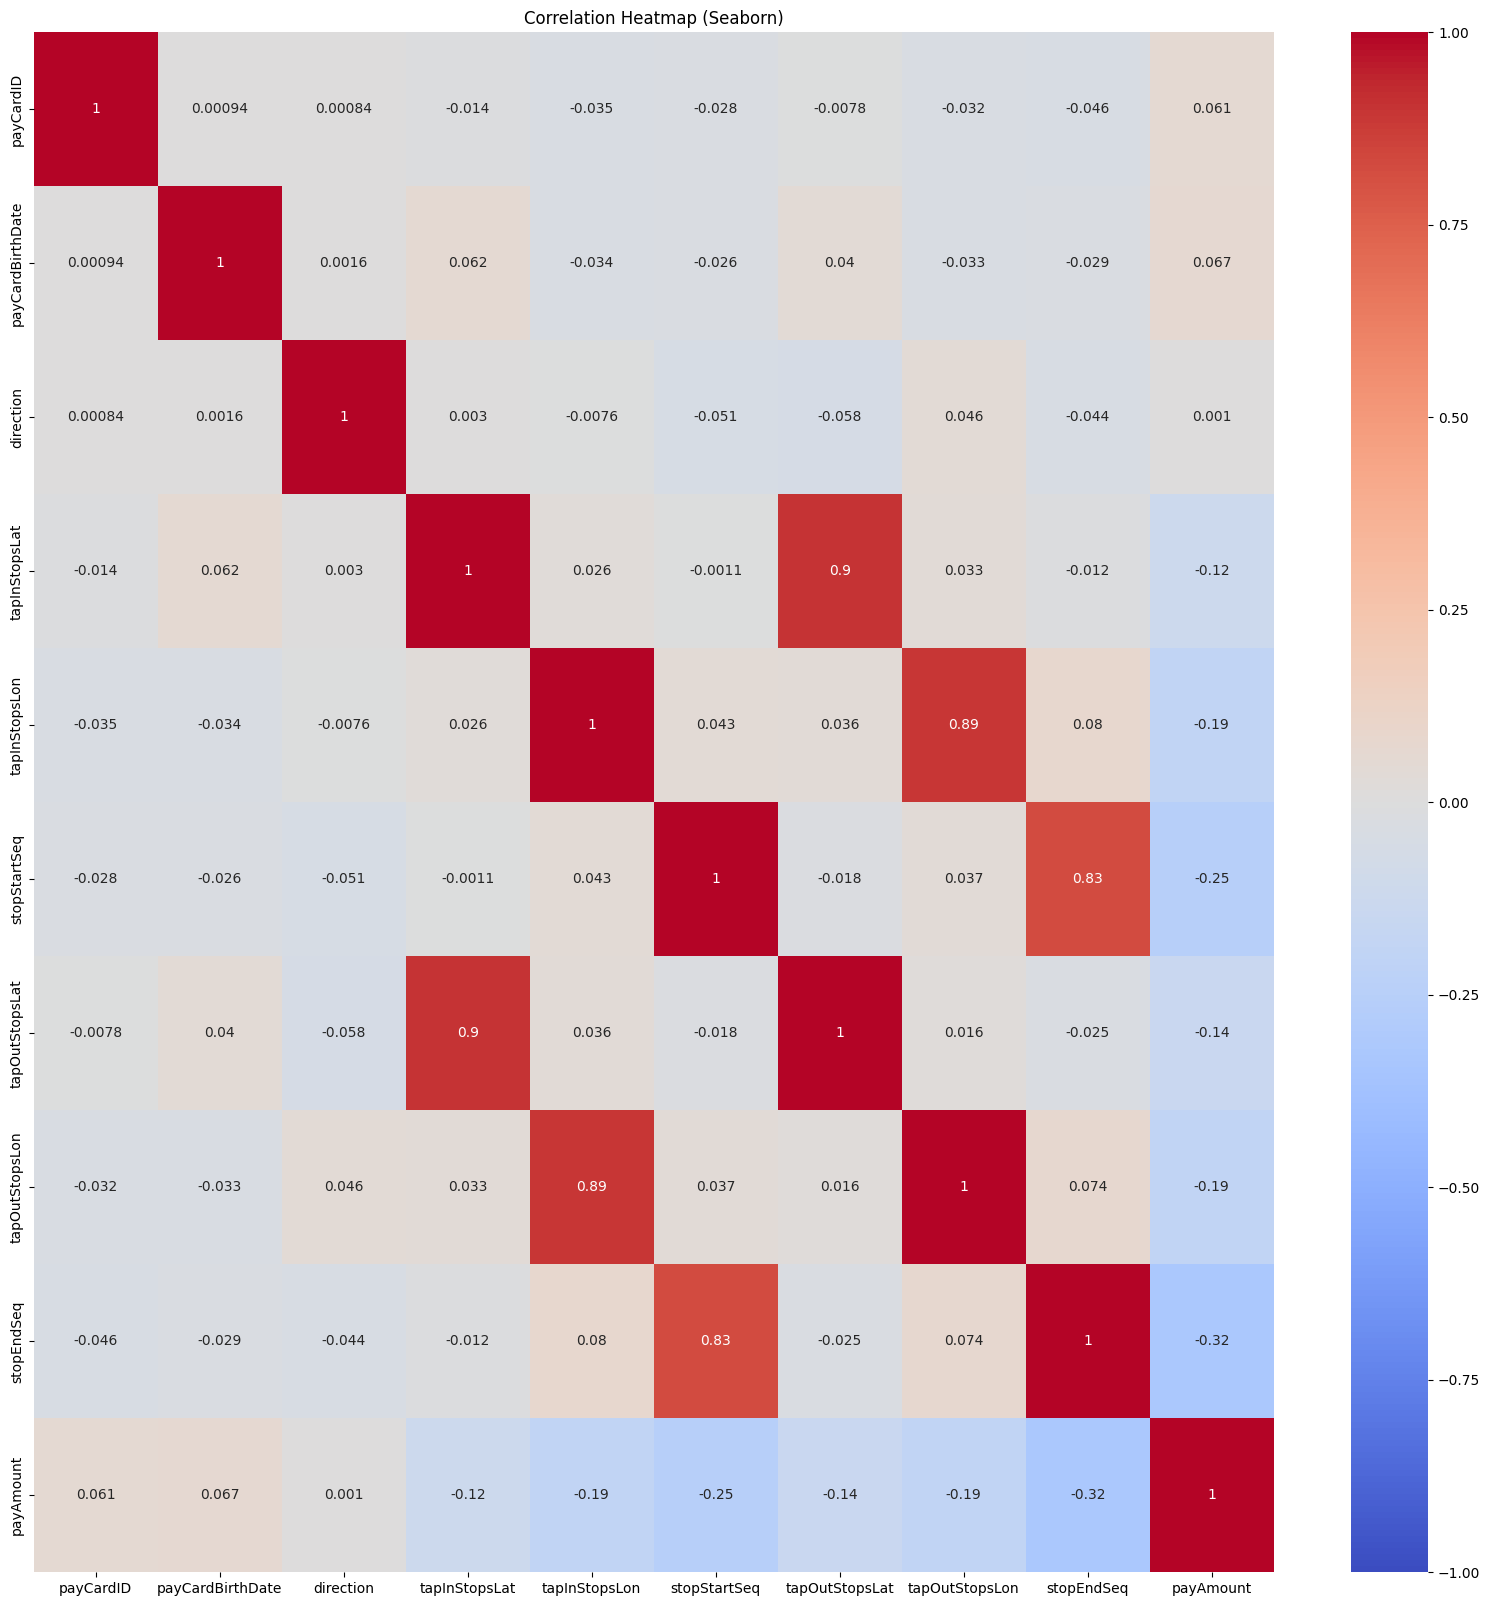

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

#### KESIMPULAN CORRELATION

Nilai korelasi baik merupakan nilai yang mendekati 1. Nilai yang mendekati 1 diantaranya:
- "tapOutStopsLat" dengan "tapInStopsLat" sebesar 0.9
- "tapInStopsLon" dengan "tapOutStopsLon" sebesar 0.89
- "stopStartSeq" dengan "stopEndSeq" sebesar 0.83

### CATEGORY VARIABLES

#### DESCRIPTIVE STATISTICS

Melihat deskripsi data kategorik

In [ ]:
data.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-17 18:14:19
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


#### UNIQUE VALUES

In [ ]:
kategorik = data.select_dtypes(include = 'object')
kategorik.nunique()

,0
transID,37900
payCardBank,6
payCardName,1993
payCardSex,2
corridorID,221
corridorName,216
tapInStops,2570
tapInStopsName,2602
tapInTime,37079
tapOutStops,2230


### KESIMPULAN DATA UNDERSTANDING

1. Dataset Transjakarta memiliki 22 kolom dan 37900 baris
2. Dataset memiliki total 38.06% missing value
3. Tidak ada data duplikat
4. TapInTime dan TapOutTime seharusnya merupakan kolom numerik (datetime)
5. Dalam dataset dapat ditambahkan kolom kategori umur dan hari untuk selanjutnya dapat lebih detail penjelasan dan analisisnya







# DATA CLEANING

In [ ]:
# Membuat salinan data yang berisi data asli dari dataset, untuk selanjutnya dataset yang asli akan digunakan dalam analisis
data_salinan = data.copy()

1. Mengubah tapInTime dan tapOutTime menjadi datetime (numerik)
2. Menghapus baris dan kolom berisi NaN dalam tapInStops dan tapOutStop yang terdeteksi melakukan pembayaran
3. Mengisi data satu sama lain yang saling berhubungan, contohnya corridorID dan corridorName
4. Kolom direksi berisi 0 dan 1, 0 untuk pergi dan 1 untuk pulang

In [ ]:
# Dari descriptive statistics, tapInTime dan tapOutTime perlu diubah menjadi datettime

# Convert tapInTime dan tapOutTime ke datetime
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

tipe data tapInTime dan tapOutTime telah terganti

#### FEATURE ENGINEERING

Menambahkan kolom untuk mempermudah visualisasi data dan analisis

##### MENAMBAHKAN KOLOM UMUR PENUMPANG BERDASARKAN PAYCARDBIRTHDATE

Kategori umur dibagi ke dalam tiga kategori

In [ ]:
# Menambahkan kolom umur dan kategorinya berdasarkan payCardBirthDate

data['age'] = 2023-data['payCardBirthDate']

def categorize_age(age):
    if age <= 18:
        return 'Muda'
    elif age <= 60:
        return 'Dewasa'
    else:
        return 'Lansia'

data['age_group'] = data['age'].apply(categorize_age)

##### MENAMBAHKAN KOLOM LAMA PERJALANAN BERDASARKAN TAPINTIME DAN TAPOUTTIME

Untuk mengetahui durasi perjalanan, kolom durasi didapatkan dari pengurangan waktu keluar dan masuk penumpang Transjakarta

In [ ]:
# Membuat kolom untuk mengetahui panjang perjalanan

data['travelDuration_min'] = ((data['tapOutTime'] - data['tapInTime']).dt.total_seconds() / 60).round(2)

##### MENAMBAHKAN KOLOM tapInDay dan tapOutDay

Kolom hari ditambahkan untuk melihat total kepadatan penumpang Transjakarta perhari dalam bulan April 2023

In [ ]:
hari_dict = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

data['tapInDay'] = data['tapInTime'].dt.day_name().map(hari_dict)
data['tapOutDay'] = data['tapOutTime'].dt.day_name().map(hari_dict)

In [ ]:
# Melihat penambahan kolom dalam dataset

data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,age_group,travelDuration_min,tapInDay,tapOutDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15,Muda,39.15,Senin,Senin
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,57.28,Senin,Senin
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,51.82,Senin,Senin
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,43.42,Senin,Senin
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa,39.47,Senin,Senin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,97.20,Jumat,Jumat
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa,35.85,Selasa,Selasa
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,177.63,Selasa,Selasa
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,47,Dewasa,28.40,Sabtu,Sabtu


#### ANALISIS DAN CLEANING MISSING VALUE

##### **CorridorID DAN CorridorName**

Melakukan cleaning data dari CorridorID dan CorridorID. CorridorID dan CorridorName saling berhubungan, sehingga missing value dari salah satu dapat diisi dari pengelompokan data yang lain

In [ ]:
# Membuat mapping dari corridorID ke corridorName
id_to_name = data[['corridorID', 'corridorName']].dropna().drop_duplicates().set_index('corridorID')['corridorName'].to_dict()
name_to_id = data[['corridorName', 'corridorID']].dropna().drop_duplicates().set_index('corridorName')['corridorID'].to_dict()


In [ ]:
# Mengisi corridorID dari corridorName
data['corridorName'] = data.apply(
    lambda row: id_to_name[row['corridorID']] if pd.isnull(row['corridorName']) and row['corridorID'] in id_to_name else row['corridorName'],
    axis=1
)

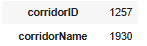

Missing Value sebelum cleaning data

In [ ]:
print(data[['corridorID', 'corridorName']].isna().sum())

corridorID      1257
corridorName    1125
dtype: int64


Missing value dari corridorName telah berkurang

Karena masih terdapat missing value, dilakukan pengecekan apakah dari kedua kolom tersebut sama-sama kosong

In [ ]:
kolom_kosong = data[data['corridorID'].isna() & data['corridorName'].isna()]
print(f"Jumlah baris kosong dua-duanya: {len(kolom_kosong)}")


Jumlah baris kosong dua-duanya: 1125


Mengisi data kosong dari kedua kolom tersebut dikarenakan untuk analisis selanjutnya dapat melihat dari latitute, longtitude, dan waktu perjalanan penumpang

In [ ]:
# Isi nilai yang hilang
data.loc[kolom_kosong.index, 'corridorID'] = 'Tidak Diketahui'
data.loc[kolom_kosong.index, 'corridorName'] = 'Tidak Diketahui'

In [ ]:
print(data[['corridorID', 'corridorName']].isna().sum())

corridorID      132
corridorName      0
dtype: int64


Missing value yang tersisa berada di corridorID, sehingga coba dilakukan mapping lagi dari corridorNama ke corridorID

In [ ]:
update_name_to_id = data.dropna(subset=['corridorID','corridorName']).drop_duplicates(subset=['corridorName']).set_index('corridorName')['corridorID'].to_dict()

In [ ]:
data['corridorID'] = data.apply(
    lambda row: update_name_to_id.get(row['corridorName'], row['corridorID']) if pd.isna(row['corridorID']) else row['corridorID'],
    axis=1
)

In [ ]:
print(data[['corridorID']].isna().sum())

corridorID    0
dtype: int64


In [ ]:
# Melihat keseluruhan data sejauh ini
pd.set_option('display.max_columns', None)
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,age_group,travelDuration_min,tapInDay,tapOutDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15,Muda,39.15,Senin,Senin
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,57.28,Senin,Senin
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,51.82,Senin,Senin
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,43.42,Senin,Senin
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa,39.47,Senin,Senin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,97.20,Jumat,Jumat
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa,35.85,Selasa,Selasa
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,177.63,Selasa,Selasa
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,47,Dewasa,28.40,Sabtu,Sabtu


In [ ]:
#Salah satu case dari corridorID dan corridorName merupakan missing value, tetapi untuk kolom yang lain lengkap
#Sebelum dicleaning, masih menggunakan dataset salinan
print(data_salinan.iloc[39])

transID                     JJEK861K6E37KF
payCardID                 3539535695881465
payCardBank                            dki
payCardName         Dr. Zulfa Tamba, S.E.I
payCardSex                               M
payCardBirthDate                      1986
corridorID                               2
corridorName                           NaN
direction                              0.0
tapInStops                          P00202
tapInStopsName                Rawa Selatan
tapInStopsLat                    -6.173925
tapInStopsLon                    106.85809
stopStartSeq                             9
tapInTime              2023-04-03 05:28:22
tapOutStops                         P00137
tapOutStopsName                      Monas
tapOutStopsLat                   -6.176248
tapOutStopsLon                   106.82286
stopEndSeq                            19.0
tapOutTime             2023-04-03 06:02:36
payAmount                           3500.0
Name: 39, dtype: object


In [ ]:
#Setelah dicleaning, menggunakan dataset asli

print(data.iloc[39])

transID                       JJEK861K6E37KF
payCardID                   3539535695881465
payCardBank                              dki
payCardName           Dr. Zulfa Tamba, S.E.I
payCardSex                                 M
payCardBirthDate                        1986
corridorID                                 2
corridorName             Pulo Gadung - Monas
direction                                0.0
tapInStops                            P00202
tapInStopsName                  Rawa Selatan
tapInStopsLat                      -6.173925
tapInStopsLon                      106.85809
stopStartSeq                               9
tapInTime                2023-04-03 05:28:22
tapOutStops                           P00137
tapOutStopsName                        Monas
tapOutStopsLat                     -6.176248
tapOutStopsLon                     106.82286
stopEndSeq                              19.0
tapOutTime               2023-04-03 06:02:36
payAmount                             3500.0
age       

Terdapat beberapa penumpang yang tidak diketahui masuk ke dalam Transjakarta melalui koridor yang mana. Hal ini dapat dijadikan sebagai evaluasi, baik bagi penumpang maupun pihak manajemen Transjakarta

##### **tapOutStops, tapOutStopsName,tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime**

tapOutStops, tapOutStopsName,tapOutStopsLat, tapOutStopsLon, stopEndSeq merupakan variabel yang saling berhubungan, sehingga analisis dapat dilihat dari antar variabel

In [ ]:
# Cek jumlah missing valuenya
tapout_columns = ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
print(data[tapout_columns].isna().sum())

tapOutStops        2289
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
dtype: int64


In [ ]:
#Imputasi tapOutStops dari tapOutStopsName
name_to_id = data.dropna(subset=['tapOutStops', 'tapOutStopsName']).drop_duplicates(subset=['tapOutStopsName']).set_index('tapOutStopsName')['tapOutStops'].to_dict()

# Imputasi
data['tapOutStops'] = data['tapOutStops'].fillna(data['tapOutStopsName'].map(name_to_id))


In [ ]:
tapout_columns = ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
print(data[tapout_columns].isna().sum())

tapOutStops        1363
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
dtype: int64


Hasil missing Value tapOutStops berkurang 926 missing value

Analisis berikutnya dapat mengisi missing value dengan mean atau median untuk kolom kategorik (tapOutTime, tapOutStops, tapOutStopsName) dan modus untuk kolom numerik (tapOutStopsLat, tapOutStopsLon, stopEndSeq)

In [ ]:
tapout_columns = ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']

# Memisahkan per kategori
numerical_columns = ['tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq']
categorical_columns = ['tapOutStops', 'tapOutStopsName', 'tapOutTime']

# Imputasi numerik: median
for col in numerical_columns:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# Imputasi kategori/waktu: mode
for col in categorical_columns:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

print(data[tapout_columns].isna().sum())


tapOutStops        0
tapOutStopsName    0
tapOutStopsLat     0
tapOutStopsLon     0
stopEndSeq         0
tapOutTime         0
dtype: int64


Missing value dari tapOutStops, tapOutStopsName,tapOutStopsLat, tapOutStopsLon, stopEndSeq telah berhasil diatasi

In [ ]:
#Sebelum dicleaning menggunakan data copy
print(data_salinan.iloc[6])

transID                    HEMW326B9N91TV
payCardID                 213155822653833
payCardBank                        emoney
payCardName         R. Devi Hariyah, S.T.
payCardSex                              M
payCardBirthDate                     1974
corridorID                         JAK.18
corridorName          Kalibata - Kuningan
direction                             0.0
tapInStops                        B00243P
tapInStopsName            Cervino Village
tapInStopsLat                   -6.224355
tapInStopsLon                   106.85165
stopStartSeq                           25
tapInTime             2023-04-03 06:58:21
tapOutStops                           NaN
tapOutStopsName                       NaN
tapOutStopsLat                        NaN
tapOutStopsLon                        NaN
stopEndSeq                            NaN
tapOutTime                            NaN
payAmount                             0.0
Name: 6, dtype: object


In [ ]:
#Data tapOutStops, tapOutStopsName,tapOutStopsLat, tapOutStopsLon, stopEndSeq setelah dicleaning
print(data.iloc[6])

transID                      HEMW326B9N91TV
payCardID                   213155822653833
payCardBank                          emoney
payCardName           R. Devi Hariyah, S.T.
payCardSex                                M
payCardBirthDate                       1974
corridorID                           JAK.18
corridorName            Kalibata - Kuningan
direction                               0.0
tapInStops                          B00243P
tapInStopsName              Cervino Village
tapInStopsLat                     -6.224355
tapInStopsLon                     106.85165
stopStartSeq                             25
tapInTime               2023-04-03 06:58:21
tapOutStops                          P00016
tapOutStopsName                         BKN
tapOutStopsLat                    -6.214718
tapOutStopsLon                    106.83458
stopEndSeq                             18.0
tapOutTime              2023-04-07 19:44:04
payAmount                               0.0
age                             

##### **tapInStopS**

tapInStops berhubungan dengan tapInStopsName sehingga nilai tapInStops bisa diambil dari tapInStopsName

In [ ]:
# Handle tapInStops

# Cek total missing value tapInStops
print(data['tapInStops'].isna().sum())

1213


In [ ]:
# Mencoba mapping nilai dari tapInStopsName
tap_stops = data.dropna(subset=['tapInStops', 'tapInStopsName']).drop_duplicates(subset=['tapInStopsName']).set_index('tapInStopsName')['tapInStops'].to_dict()


In [ ]:
data['tapInStops'] = data.apply(
    lambda row: tap_stops.get(row['tapInStopsName'], row['tapInStops'])
                if pd.isna(row['tapInStops'])
                else row['tapInStops'],
    axis=1
)

In [ ]:
(data['tapInStops'].isna().sum())

np.int64(34)

Ketika dicek lebih lanjut, missing value tapInStops menjadi berjumlah 34, untuk selanjutnya dapat dilakukan analisis dengan melihat jarak terdekat dari penumpang yang turun atau melalui panjang perjalanan

In [ ]:
# Halte referensi dengan ID dan koordinat
known_stops = data.dropna(subset=['tapInStops', 'tapInStopsLat', 'tapInStopsLon']).drop_duplicates(subset=['tapInStops'])[['tapInStops', 'tapInStopsLat', 'tapInStopsLon']]


In [ ]:
missing_stops = data[data['tapInStops'].isna() & data['tapInStopsLat'].notna() & data['tapInStopsLon'].notna()]

In [ ]:
# Pengisian dilakukan menggunakan jarak terdekat dari penumpang turun (tapOutStops/tapOutStopsName)

from scipy.spatial import cKDTree
import numpy as np

# Buat pohon KD untuk matching koordinat cepat
tree = cKDTree(known_stops[['tapInStopsLat', 'tapInStopsLon']].values)

# Ambil koordinat dari baris yang ingin diisi
missing_coords = missing_stops[['tapInStopsLat', 'tapInStopsLon']].values

# Cari indeks halte terdekat
dists, indices = tree.query(missing_coords, k=1)  # k=1: cari satu titik terdekat

# Ambil tapInStops dari halte terdekat
nearest_ids = known_stops.iloc[indices]['tapInStops'].values

# Update nilai yang hilang
data.loc[missing_stops.index, 'tapInStops'] = nearest_ids

In [ ]:
print(data['tapInStops'].isna().sum())

0


In [ ]:
#Melihat tapInStops dari dataset asli yang masih belum dicleaning, salah satunya di baris ke-21
data_salinan[data_salinan['tapInStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,Lippo Mall Kramat Jati,-6.270835,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.852930,20.0,2023-04-03 05:30:45,0.0
41,VUWZ891M7I57EB,344303671677311,emoney,"R. Mila Wahyuni, S.Sos",F,2006,R1A,Pantai Maju - Kota,1.0,NaN,Jln. BB Utara,-6.120279,106.79409,12,2023-04-03 06:50:06,B00242P,Centro Metro Broadway,-6.116362,106.761430,29.0,2023-04-03 07:30:53,3500.0
101,XVWU715D9V59FV,4744480387450088900,brizzi,Galur Riyanti,F,1980,JAK.44,Andara - Stasiun Universitas Pancasila,0.0,NaN,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,0,2023-04-03 06:45:56,B01846P,Kav Polri Blok E Jagakarsa,-6.314309,106.816330,13.0,2023-04-03 07:36:05,0.0
122,ENXD420E9G92TO,4817620823758230,dki,"Dina Halimah, S.Psi",F,1993,JAK.07,Tanah Abang - Grogol via Tawakal,0.0,NaN,Wisma Asia II,-6.189386,106.79791,19,2023-04-03 06:21:20,B04952P,Simpang Kota Bambu Utara I,-6.186126,106.808660,24.0,2023-04-03 07:09:28,0.0
163,SRLS290P0Y95NP,180074853270640,emoney,"Dr. Laswi Usamah, S.Ked",F,1959,7Q,Blok M - PGC,1.0,NaN,Wolter Monginsidi,-6.238799,106.81376,26,2023-04-03 06:12:58,B01437P,Jln. Palatehan,-6.240057,106.800758,31.0,2023-04-03 06:42:20,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37775,MYWZ762F5O31MX,344406439989280,emoney,R. Respati Usamah,F,2012,JAK.53,Grogol - Pos Pengumben via Slipi,0.0,NaN,Sbr. Gg. Langgar Kelapa Dua,-6.213145,106.76935,68,2023-04-09 18:19:04,B01162P,Jln. Inspeksi Kali Pesanggrahan Barat,-6.208392,106.764670,70.0,2023-04-09 19:42:22,0.0
37816,HRMG833E4D75MZ,2264435942253035,dki,Vanya Anggraini,F,2007,JAK.26,Rawamangun - Duren Sawit,1.0,NaN,Cipinang Lontar Rusun Polri,-6.206815,106.88785,12,2023-04-11 08:05:50,B02941P,Pool Hiba Utama 1,-6.206384,106.902690,32.0,2023-04-11 10:24:43,0.0
37822,XWEY170L8K03CW,3538799233101916,dki,Lantar Maheswara,F,1983,JAK.20,Cawang UKI - Lubang Buaya,1.0,NaN,Menara Cardig,-6.251608,106.88040,34,2023-04-24 11:54:53,B04630P,Sekolah Fatimiyah Perdana Kusuma,-6.249936,106.880030,35.0,2023-04-24 14:42:13,0.0
37855,OCHT739D6O31VL,4434749577653,online,drg. Ifa Salahudin,M,1950,JAK.16,Cililitan - Condet,1.0,NaN,Kel. Balekambang,-6.281630,106.84996,10,2023-04-12 15:04:05,B03442P,Sbr. Akses Jembatan Ciliwung Balekambang,-6.283464,106.849450,12.0,2023-04-12 16:54:34,0.0


In [ ]:
#Melihat tapInStops sebelum dicleaning (baris ke-21)
print(data_salinan.iloc[21])

transID                     ZJVI960B9I42DA
payCardID                  343851798729291
payCardBank                         emoney
payCardName                   Garang Utama
payCardSex                               F
payCardBirthDate                      1997
corridorID                          JAK.16
corridorName            Cililitan - Condet
direction                              0.0
tapInStops                             NaN
tapInStopsName      Lippo Mall Kramat Jati
tapInStopsLat                    -6.270835
tapInStopsLon                    106.86741
stopStartSeq                             4
tapInTime              2023-04-03 05:08:36
tapOutStops                        B01393P
tapOutStopsName      Jln. Mesjid Al Mabruk
tapOutStopsLat                    -6.28435
tapOutStopsLon                   106.85293
stopEndSeq                            20.0
tapOutTime             2023-04-03 05:30:45
payAmount                              0.0
Name: 21, dtype: object


In [ ]:
#Melihat tapInStops telah terisi setelah dicleaning
print(data.iloc[21])

transID                       ZJVI960B9I42DA
payCardID                    343851798729291
payCardBank                           emoney
payCardName                     Garang Utama
payCardSex                                 F
payCardBirthDate                        1997
corridorID                            JAK.16
corridorName              Cililitan - Condet
direction                                0.0
tapInStops                           B02144P
tapInStopsName        Lippo Mall Kramat Jati
tapInStopsLat                      -6.270835
tapInStopsLon                      106.86741
stopStartSeq                               4
tapInTime                2023-04-03 05:08:36
tapOutStops                          B01393P
tapOutStopsName        Jln. Mesjid Al Mabruk
tapOutStopsLat                      -6.28435
tapOutStopsLon                     106.85293
stopEndSeq                              20.0
tapOutTime               2023-04-03 05:30:45
payAmount                                0.0
age       

Setelah dilakukan pengecekan terhadap tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapInStops. Dapat dilakukan analisis untuk missing data yang lainnya

In [ ]:
data.name = "Jumlah Missing Value"
data.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


##### **payAmount**


*   PayAmount merupakan kolom numerik, sehingga untuk pengisiannya dapat menggunakan median atau mean
*   Untuk mengisi payAmount tidak dapat menggunakan selain metode median atau mean berdasarkan correlation yang telah dilakukan


In [ ]:
payamount_columns = ['payAmount']

# Imputasi numerik: median
for col in payamount_columns:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

(data[payamount_columns].isna().sum())

,0
payAmount,0


In [ ]:
# Melihat missing value dari dataset copy (berisi dataset asli)
(data_salinan[data_salinan['payAmount'].isna()])

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN
76,VHUC320U1S58CB,567286069354,flazz,"Dt. Atmaja Suartini, M.Farm",F,2000,JAK.48B,Stasiun Tebet - Kampung Melayu,0.0,B02272P,Masjid As Sudairi,-6.220626,106.85910,1,2023-04-03 06:12:01,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-03 06:57:35,NaN
97,KFYK655N1H73XS,6590854673757012,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0.0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-03 06:03:19,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:04,NaN
169,IWEH403G6J82OS,30428250357040,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:08,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:02,NaN
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,Telkom Tebet,-6.224064,106.85160,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37661,PPYR040S6J76TM,4706129919148789,dki,Dt. Galuh Suryono,F,1987,M7B,BKN - Blok M,0.0,B03195P,RSIA Duren Tiga 1,-6.253592,106.84130,10,2023-04-16 13:52:59,B02877P,PLN Duren Tiga 1,-6.254389,106.83416,13.0,2023-04-16 16:38:08,NaN
37674,JXJU834Q7X41YL,4558670606659888636,brizzi,Tantri Siregar,M,1996,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B03305P,Sahid Sudirman Center,-6.211191,106.81794,10,2023-04-21 14:08:16,B03318P,Sawo Kecik Raya,-6.224852,106.85489,22.0,2023-04-21 16:56:14,NaN
37741,DEMB799H8M93RH,572311836488,flazz,Cornelia Haryanti,F,1989,3H,Jelambar - Kota,0.0,P00072,Glodok,-6.144500,106.81545,7,2023-04-07 13:19:18,P00013,Kota,-6.136790,106.81490,10.0,2023-04-07 14:05:43,NaN
37861,EDZA126J0W55DK,3520040370814007,dki,Farah Latupono,M,2010,M1H,Tanah Abang - St. Gondangdia,0.0,B01232P,Jln. Kb. Kacang VIII,-6.187181,106.81827,8,2023-04-30 15:52:34,B02972P,Pospol Jati Bunder,-6.189707,106.81317,15.0,2023-04-30 18:38:25,NaN


In [ ]:
# Melihat data payAmount sebelum dicleaning
print(data_salinan.iloc[11])

transID                    IIEK980X1O23NZ
payCardID                 347204308990092
payCardBank                        emoney
payCardName         R.M. Labuh Laksmiwati
payCardSex                              F
payCardBirthDate                     1984
corridorID                            M7B
corridorName                 BKN - Blok M
direction                             1.0
tapInStops                         P00254
tapInStopsName                    Tendean
tapInStopsLat                   -6.240213
tapInStopsLon                   106.83102
stopStartSeq                           12
tapInTime             2023-04-03 06:22:10
tapOutStops                        P00129
tapOutStopsName          Mampang Prapatan
tapOutStopsLat                  -6.242699
tapOutStopsLon                  106.82572
stopEndSeq                           14.0
tapOutTime            2023-04-03 06:50:21
payAmount                             NaN
Name: 11, dtype: object


In [ ]:
# Melihat data payAmount yang telah dicleaning
print(data.iloc[11])

transID                      IIEK980X1O23NZ
payCardID                   347204308990092
payCardBank                          emoney
payCardName           R.M. Labuh Laksmiwati
payCardSex                                F
payCardBirthDate                       1984
corridorID                              M7B
corridorName                   BKN - Blok M
direction                               1.0
tapInStops                           P00254
tapInStopsName                      Tendean
tapInStopsLat                     -6.240213
tapInStopsLon                     106.83102
stopStartSeq                             12
tapInTime               2023-04-03 06:22:10
tapOutStops                          P00129
tapOutStopsName            Mampang Prapatan
tapOutStopsLat                    -6.242699
tapOutStopsLon                    106.82572
stopEndSeq                             14.0
tapOutTime              2023-04-03 06:50:21
payAmount                            3500.0
age                             

##### **Travel Duration (dari tambahan kolom)**

In [ ]:
data[data['travelDuration_min'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,age_group,travelDuration_min,tapInDay,tapOutDay
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,0.0,49,Dewasa,NaN,Senin,NaN
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,0.0,28,Dewasa,NaN,Senin,NaN
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,20000.0,42,Dewasa,NaN,Senin,NaN
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,Cempaka Mas,-6.165888,106.87920,7,2023-04-03 05:40:04,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,3500.0,25,Dewasa,NaN,Senin,NaN
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,Dispenda Samsat Barat,-6.154634,106.73810,11,2023-04-03 06:15:53,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,3500.0,12,Muda,NaN,Senin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37738,HVBG065E5W16QD,5340783842827882,dki,Rendy Pratama,F,1989,5F,Kampung Melayu - Tanah Abang,1.0,B02318P,Masjid Jami Al Makmur 2,-6.188960,106.81516,0,2023-04-30 07:34:10,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,3500.0,34,Dewasa,NaN,Minggu,NaN
37762,LBYO897O0Z89FX,4159889370953,online,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.85280,20,2023-04-21 12:08:43,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,0.0,31,Dewasa,NaN,Jumat,NaN
37777,JBJR710B1I01HV,4380502298652105326,brizzi,Ella Zulkarnain,M,1990,JAK.30,Grogol - Meruya via Roxy,1.0,B01914P,Kel. Duri Kepa,-6.185225,106.77307,43,2023-04-03 21:59:15,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,0.0,33,Dewasa,NaN,Senin,NaN
37796,UJTW104Z9P85GX,6507084113625619,dki,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,Puskesmas Petojo Utara,-6.168238,106.81088,7,2023-04-02 05:55:01,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,3500.0,21,Dewasa,NaN,Minggu,NaN


Travel duration berhubungan dengan tapInTime dan tapOutTime sehingga missing value nya dapat diisi dengan mean/median

In [ ]:
median_duration = data['travelDuration_min'].median()
data['travelDuration_min'] = data['travelDuration_min'].fillna(median_duration)

In [ ]:
# Melakukan pengecekan data payAmount setelah dicleaning

data.iloc[6]

,6
transID,HEMW326B9N91TV
payCardID,213155822653833
payCardBank,emoney
payCardName,"R. Devi Hariyah, S.T."
payCardSex,M
payCardBirthDate,1974
corridorID,JAK.18
corridorName,Kalibata - Kuningan
direction,0.0
tapInStops,B00243P


##### **tapOutDay (dari tambahan kolom)**

In [ ]:
# Transjakarta beroperasi setiap hari dan antar-kota, maka missing value dari tapOutDay dapat diisi dari tapInDay

In [ ]:
data['tapOutDay'] = data['tapOutDay'].fillna(data['tapInDay'])

#### KESIMPULAN

<Axes: >

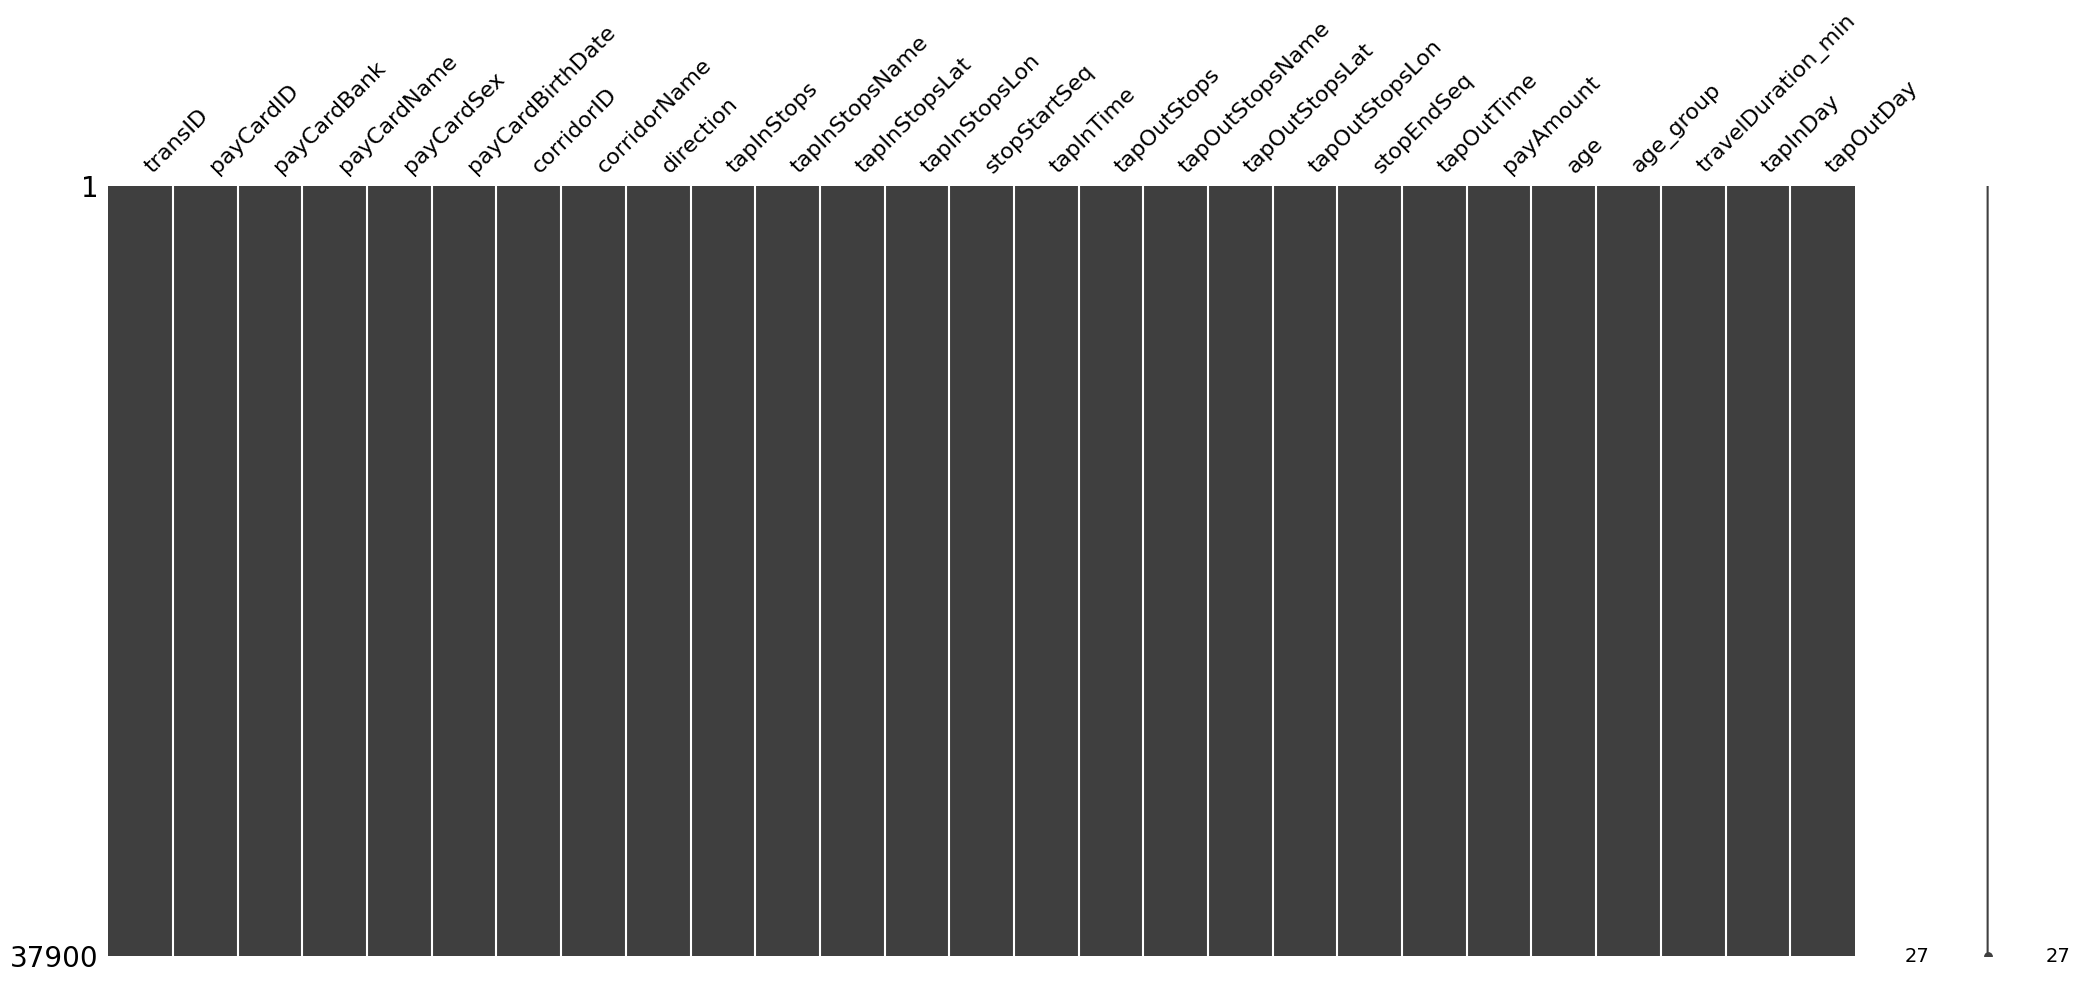

In [ ]:
#Melihat sebaran missing value setelah dicleaning
msno.matrix(data)

# EXPLORATORY DATA ANALYSIS (2)

In [ ]:
data

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,age_group,travelDuration_min,tapInDay,tapOutDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15,Muda,39.15,Senin,Senin
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,57.28,Senin,Senin
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,51.82,Senin,Senin
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,43.42,Senin,Senin
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa,39.47,Senin,Senin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,97.20,Jumat,Jumat
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa,35.85,Selasa,Selasa
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,177.63,Selasa,Selasa
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,47,Dewasa,28.40,Sabtu,Sabtu


#### INFORMASI DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transID             37900 non-null  object        
 1   payCardID           37900 non-null  int64         
 2   payCardBank         37900 non-null  object        
 3   payCardName         37900 non-null  object        
 4   payCardSex          37900 non-null  object        
 5   payCardBirthDate    37900 non-null  int64         
 6   corridorID          37900 non-null  object        
 7   corridorName        37900 non-null  object        
 8   direction           37900 non-null  float64       
 9   tapInStops          37900 non-null  object        
 10  tapInStopsName      37900 non-null  object        
 11  tapInStopsLat       37900 non-null  float64       
 12  tapInStopsLon       37900 non-null  float64       
 13  stopStartSeq        37900 non-null  int64     

#### DESCRIPTIVE STATISTICS

In [ ]:
data.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,travelDuration_min
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900,37900.000000,37900.000000,37900.000000,37900,37900.000000,37900.000000,37900.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,2023-04-16 08:05:29.462770688,-6.214654,106.840997,21.105726,2023-04-16 02:02:18.019947264,2720.976253,32.910686,72.114953
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000,11.000000,15.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:02:15,-6.245440,106.801940,11.000000,2023-04-09 07:20:05.750000128,0.000000,22.000000,51.765000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:38:42.500000,-6.214718,106.834580,18.000000,2023-04-15 19:52:38,3500.000000,33.000000,71.830000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,2023-04-22 05:12:02.500000,-6.175799,106.882030,29.000000,2023-04-21 19:57:40,3500.000000,41.000000,94.870000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000,77.000000,179.050000
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,NaN,0.057966,0.059921,13.566851,NaN,4157.880625,13.051482,27.570675


Nilai NaN (std) pada kolom tapInTime dan tapOutTime bukan dikarenakan terdapat missing value, akan tetapi nilai std tidak dapat menghitung statistik berdasarkan datetime, untuk melihat lebih jelas dapat describe kolom numerik dan datettime seperti berikut.

In [ ]:
data[['tapInTime', 'tapOutTime']].agg(['min', 'max'])

,tapInTime,tapOutTime
min,2023-04-01 06:22:27,2023-04-01 07:27:31
max,2023-04-30 21:55:41,2023-04-30 23:23:18


#### GRAFIK HISTOGRAM

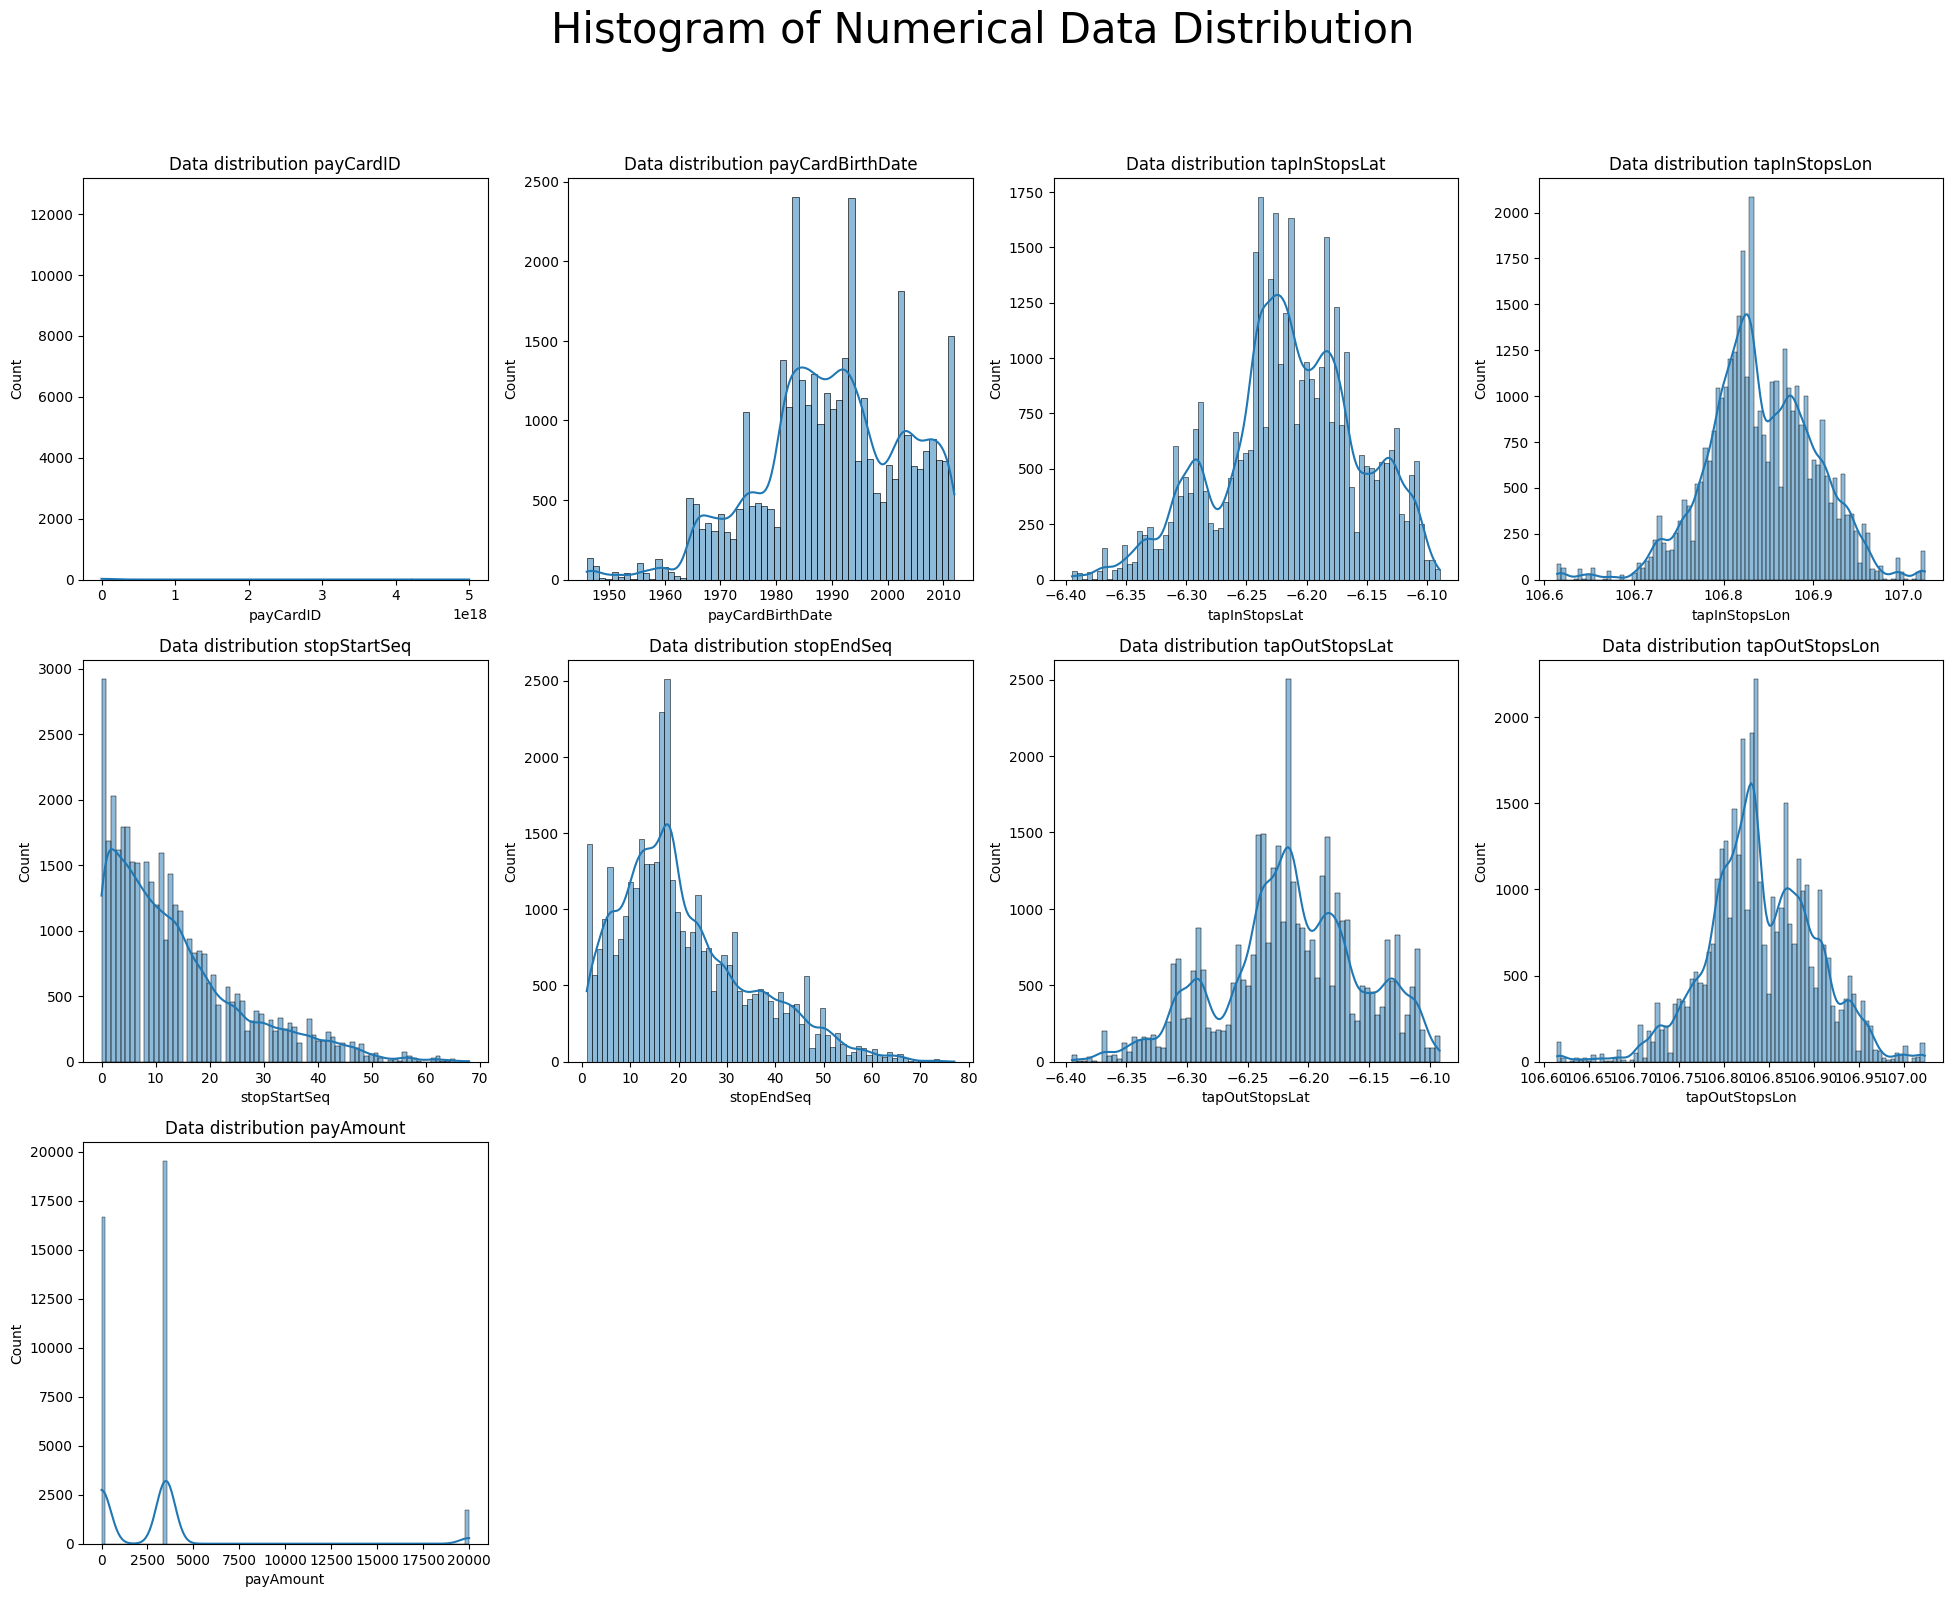

In [ ]:
listKolomclean = ['payCardID','payCardBirthDate','tapInStopsLat','tapInStopsLon','stopStartSeq','stopEndSeq','tapOutStopsLat','tapOutStopsLon','payAmount']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom >= len(listKolomclean) :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data, x=listKolomclean[kolom], kde=True)
            plt.title(f'Data distribution {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Histogram of Numerical Data Distribution', size=30, y=0.95)
plt.show()

BOXPLOT

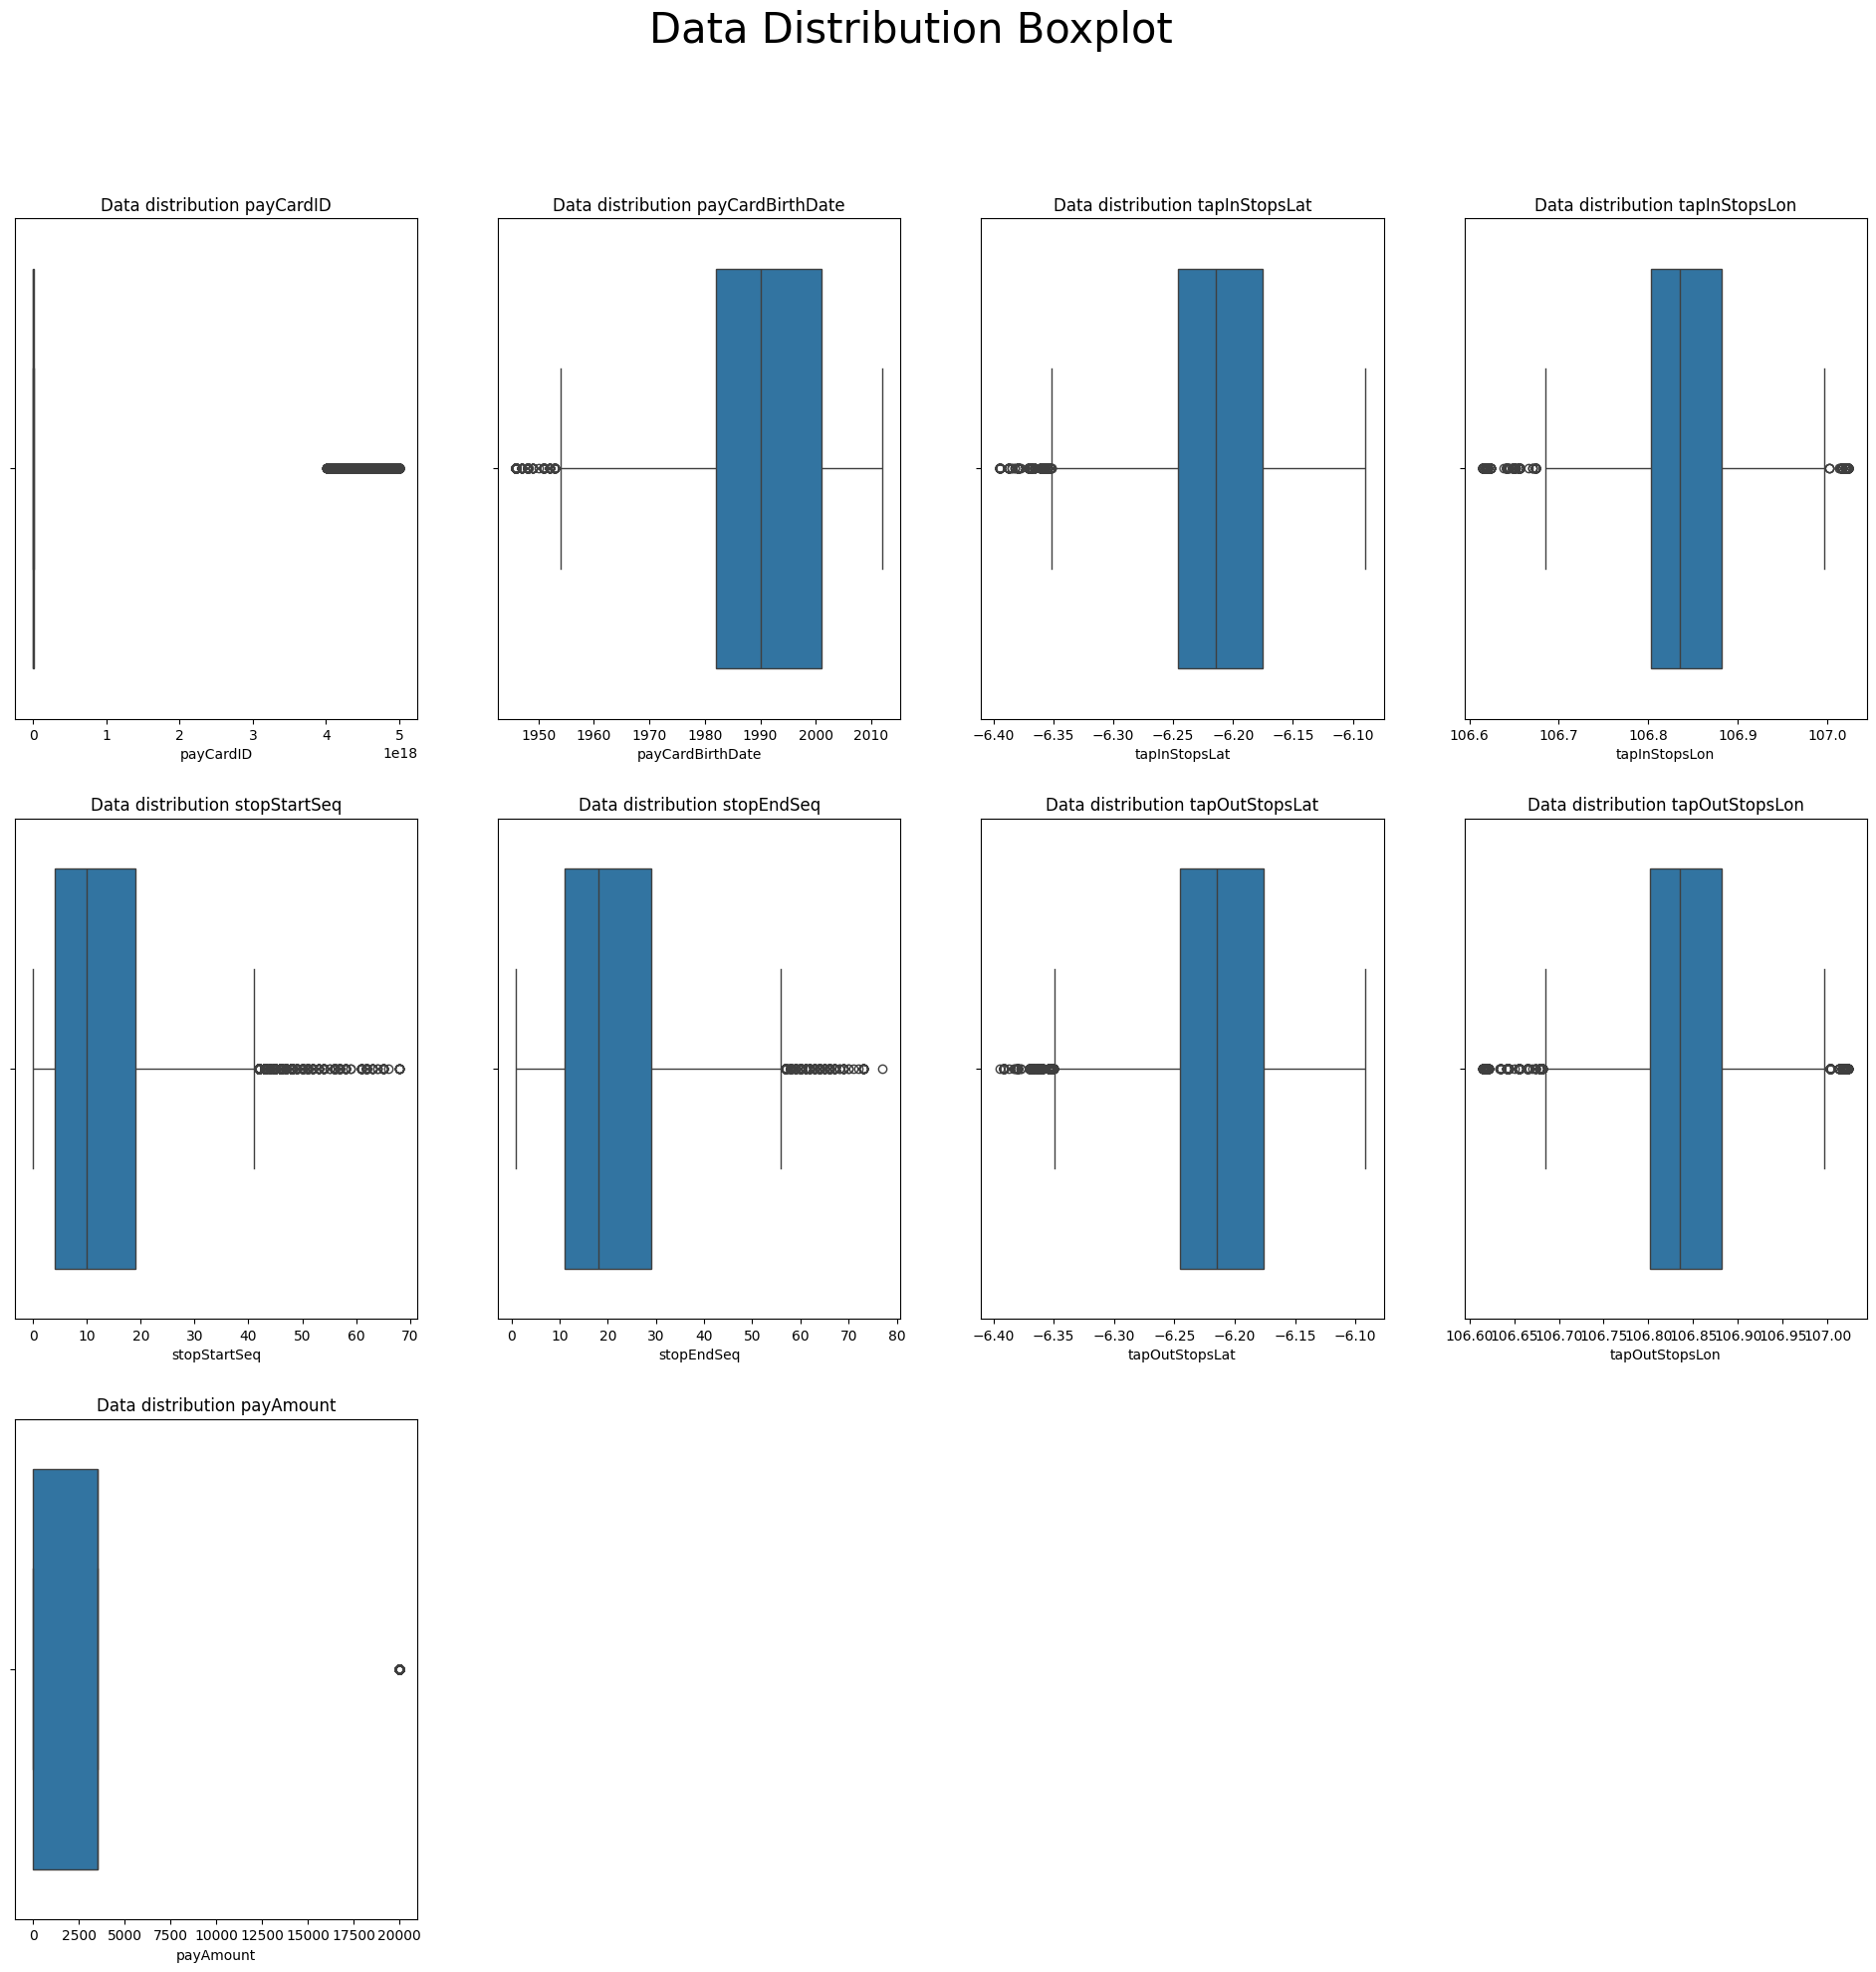

In [ ]:
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,30))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom >= len(listKolomclean) : # Corrected loop condition
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data, x=listKolomclean[kolom])
            plt.title(f'Data distribution {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Data Distribution Boxplot', size=30, y=0.95)
plt.show()

#### UJI STATISTIK

In [ ]:
# Kolom numerik
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [ ]:
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(data[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR payCardID:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.5310, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.3372, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 20865.8247, p-value: 0.0000 -> Not Normal


RESULTS FOR payCardBirthDate:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0526, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9766, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 1000.1631, p-value: 0.0000 -> Not Normal


RESULTS FOR direction:
Kolmogorov-Smirnov - Statistic: 0.5000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.3417, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.6366, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 129393.9440, p-value: 0.0000 -> Not Normal


RESULTS FOR tapInStopsLat:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37900.
  res = hypotest_fun_out(*samples, **kwds)


Distribusi tidak normal

##### UJI STATISTIK INTERFERENSIAL

Dari uji statistik, hasil dari semua kolom merupakan distribusi tidak normal

Uji statistik interferensial merupakan pengujian terhadap distribusi tidak normal. Hipotesis yang dilakukan merupakan hipotesis dari penambahan kolom umur dan panjang durasi/lama perjalanan penumpang yang belum diketahui korelasinya

###### PENGARUH UMUR TERHADAP PAYAMOUNT

In [ ]:
# Menggunakan Kruskal Walis

H0 = "tidak terdapat hubungan antara umur dengan payAmount"
Ha = "terdapat hubungan antara umur dengan payAmount"

stat, pval = kruskal(
    data[data['age_group'] == 'Muda']['payAmount'],
    data[data['age_group'] == 'Dewasa']['payAmount'],
    data[data['age_group'] == 'Lansia']['payAmount']
)

if pval < 0.05:
    print('H0 ditolak sehingga tidak terdapat hubungan antara umur dengan payAmount')
else:
    print('Ha diterima sehingga terdapat hubungan antara umur dengan payAmount')

H0 ditolak sehingga tidak terdapat hubungan antara umur dengan payAmount


###### PENGARUH LAMA PERJALANAN TERHADAP PAYAMOUNT

In [ ]:
# Uji Interferensial menggunakan Kruskal Walis

H0 = "terdapat hubungan antara lama perjalanan dengan payAmount"
Ha = "tidak terdapat hubungan antara lama perjalanan dengan payAmount"

stat, pval = kruskal(
    data[data['travelDuration_min'] <= 30]['payAmount'],
    data[(data['travelDuration_min'] > 30)]['payAmount'],
    data[(data['travelDuration_min'] > 60)]['payAmount']
)

if pval < 0.05:
    print('H0 ditolak sehingga terdapat hubungan antara lama perjalanan dengan payAmount')
else:
    print('Ha diterima sehingga tidak terdapat hubungan antara lama perjalanan dengan payAmount')

Ha diterima sehingga tidak terdapat hubungan antara lama perjalanan dengan payAmount


Dari kedua hipotesis yang telah dilakukan melalui UjiStatistik Interferensial, tidak terdapat hubungan apapun baik dari umur maupun lama perjalanan terhadap nominal pembayaran yang dibayarkan penumpang Transjakarta

#### PENJELASAN GENERAL

1. payCardBank digunakan oleh masing-masing penumpang sebagai alat pembayaran untuk menaiki Transjakarta
2. payCardBirthDate dibagi menjadi kolom age dan age_group (Muda, Dewasa, Lansia) untuk memudahkan pengelompokan
3. tapInTime dan tapOutTime merupakan waktu dimana penumpang naik dan turun sesuai tujuan
4. Direction merupakan arah tujuan penumpang, pulang atau pergi

In [ ]:
# Memastikan lagi tidak terdapat missing value sebelum dianalisis melalui visualisasi gambar
data.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


# VISUALISASI DATA

Visualisasi data yang dibutuhkan untuk dianalisis, diantaranya visualisasi dari kategori umur penumpang, gender, kepadatan penumpang dalam satu minggu, dan *peak hour*.

##### payCardBank

In [ ]:
# Melihat total pengguna per masing-masing payCardBank

cardbank_counts = data['payCardBank'].value_counts()
cardbank_counts

,count
payCardBank,
dki,18743
emoney,6866
brizzi,3531
flazz,3234
online,2869
bni,2657


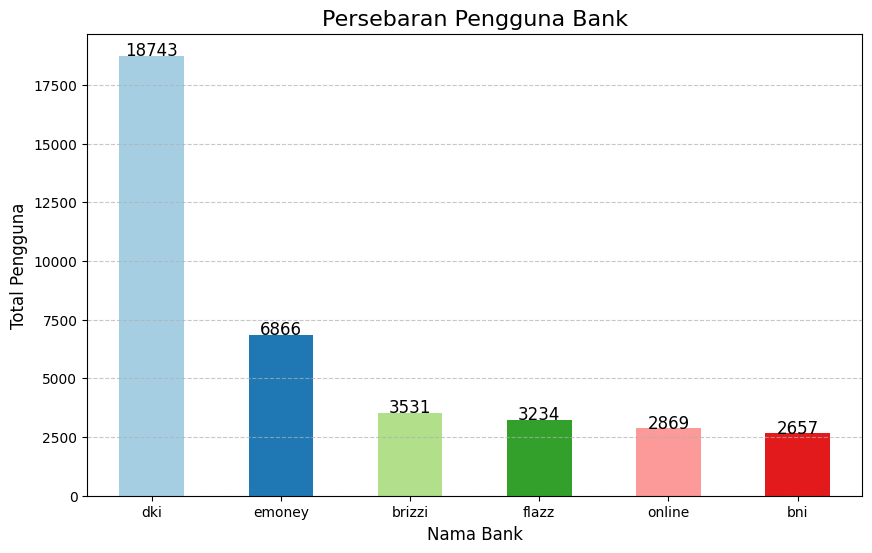

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = cardbank_counts.plot(kind='bar', color=plt.cm.Paired(range(len(cardbank_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Persebaran Pengguna Bank', fontsize=16)
plt.xlabel('Nama Bank', fontsize=12)
plt.ylabel('Total Pengguna', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('CardBank.png')
plt.show()

CardBank DKI memiliki tingkat pengguna paling banyak dibandingkan kartu yang lainnya

##### age

Setelah mendapatkan visualisasi data dari kartu pembayaran. Selanjutnya melihat visualisasi dari kategori umur penumpang Transjakarta

In [ ]:
agegroup_counts = data['age_group'].value_counts()
agegroup_counts

,count
age_group,
Dewasa,31004
Muda,6123
Lansia,773


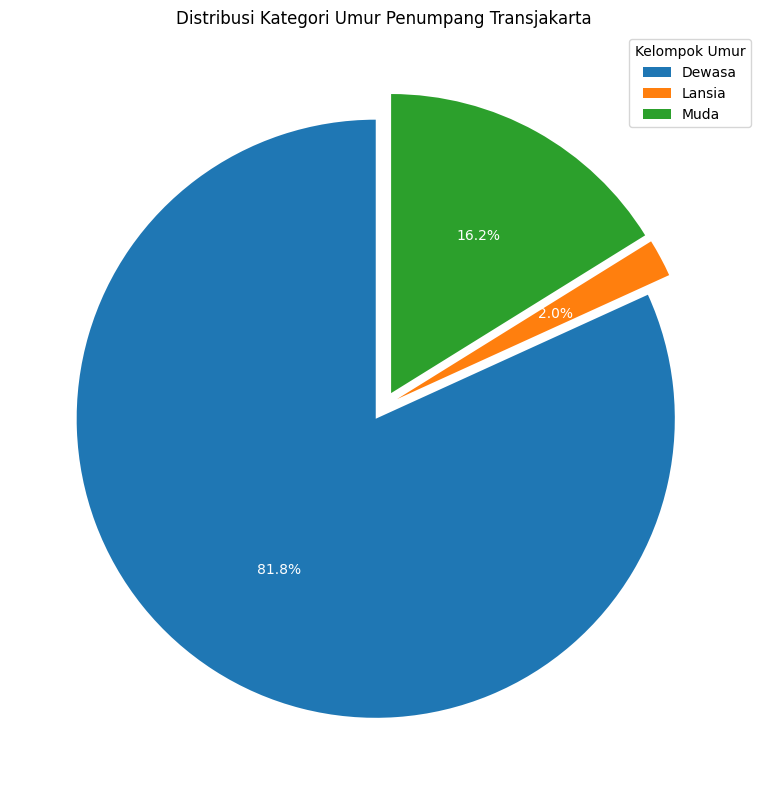

In [ ]:
# Hitung jumlah penumpang untuk tiap kelompok umur
agegroup_counts = data['age_group'].value_counts().sort_index()

# Buat explode agar semua bagian pie sedikit terpisah
explode = [0.05] * len(agegroup_counts)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    agegroup_counts.values,         # jumlah penumpang
    labels=agegroup_counts.index,   # nama kelompok umur
    autopct='%1.1f%%',
    textprops={'color': "w"},
    explode=explode,
    startangle=90
)

plt.title("Distribusi Kategori Umur Penumpang Transjakarta")
plt.legend(title="Kelompok Umur")
plt.tight_layout()
plt.show()


##### payCardSex

Penumpang Transjakarta dianalisis untuk mengetahui gender dan melihat perbandinngannya

In [ ]:
cardsex_counts = data['payCardSex'].value_counts()
cardsex_counts

,count
payCardSex,
F,20157
M,17743


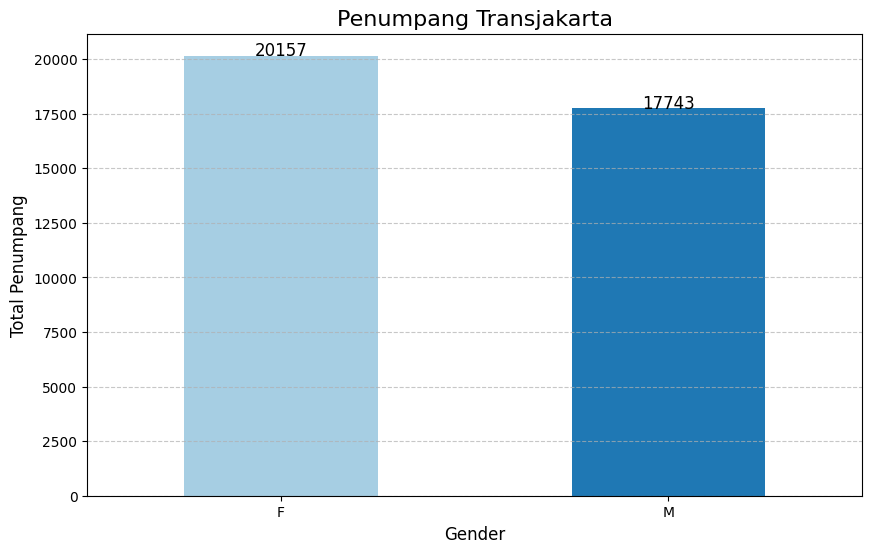

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = cardsex_counts.plot(kind='bar', color=plt.cm.Paired(range(len(cardsex_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Penumpang Transjakarta', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Penumpang', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('CardSex.png')
plt.show()

Penumpang Transjakarta didominasi oleh penumpang perempuan (F)

##### corridorName

In [ ]:
corrname_counts = data['corridorName'].value_counts().head()
corrname_counts

,count
corridorName,
Tidak Diketahui,1125
Cibubur - Balai Kota,400
Ciputat - CSW,388
Pulo Gadung - Monas,349
Harmoni - Jakarta International Stadium,342


Banyak penumpang yang tidak tercatat melalui koridor mana penumpang mulai melakukan tapIn

In [ ]:
# Untuk lebih bersih dan melihat dengan lebih jelas, dapat mengambil baris dari indeks ke-1 hingga 5

corrname_counts1 = data['corridorName'].value_counts().iloc[1:11]
corrname_counts1


,count
corridorName,
Cibubur - Balai Kota,400
Ciputat - CSW,388
Pulo Gadung - Monas,349
Harmoni - Jakarta International Stadium,342
Kebayoran Lama - Tanah Abang,339
Kalideres - Bundaran HI via Veteran,336
Kampung Rambutan - Pondok Gede,333
Rusun Pondok Bambu - Walikota Jakarta Timur,332
Rusun Rawa Bebek - Kodamar,318


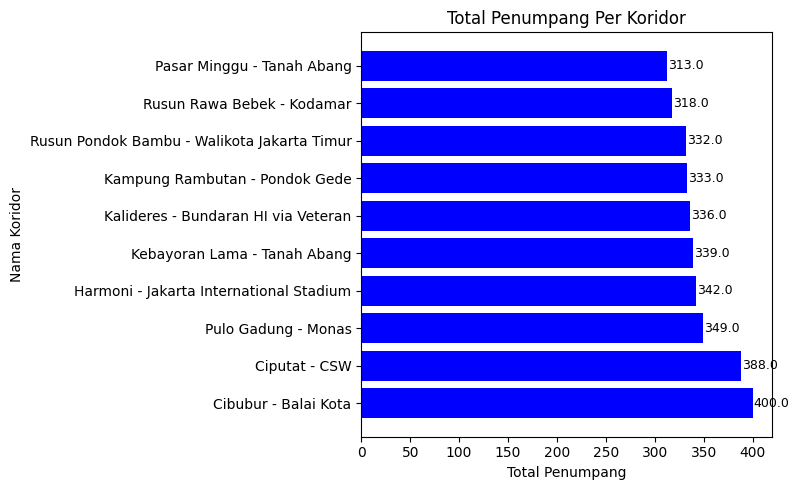

In [ ]:
plt.figure(figsize=(8, 5))

# Membuat bar chart horizontal
bars = plt.barh(corrname_counts1.index, corrname_counts1.values, color='blue')

# Tambahkan angka di samping bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1,
             bar.get_y() + bar.get_height()/2,
             f'{width:.1f}',
             va='center', fontsize=9)

plt.title('Total Penumpang Per Koridor')
plt.xlabel('Total Penumpang')
plt.ylabel('Nama Koridor')
plt.tight_layout()
plt.show()

##### tapInStopsName

Dalam koridor, terdapat beberapa rute awal/halte/tapInStopsName sehingga dapat dilakukan analisis untuk mengetahui rute awal penumpang mana yang terbanyak

In [ ]:
tapinstopsname_counts = data['tapInStopsName'].value_counts().head(10)
tapinstopsname_counts

,count
tapInStopsName,
Penjaringan,243
Garuda Taman Mini,208
BKN,173
BNN LRT,155
Pejaten,152
Cibubur Junction,133
Rusun Kapuk Muara,131
Penggilingan,130
Seskoal,126


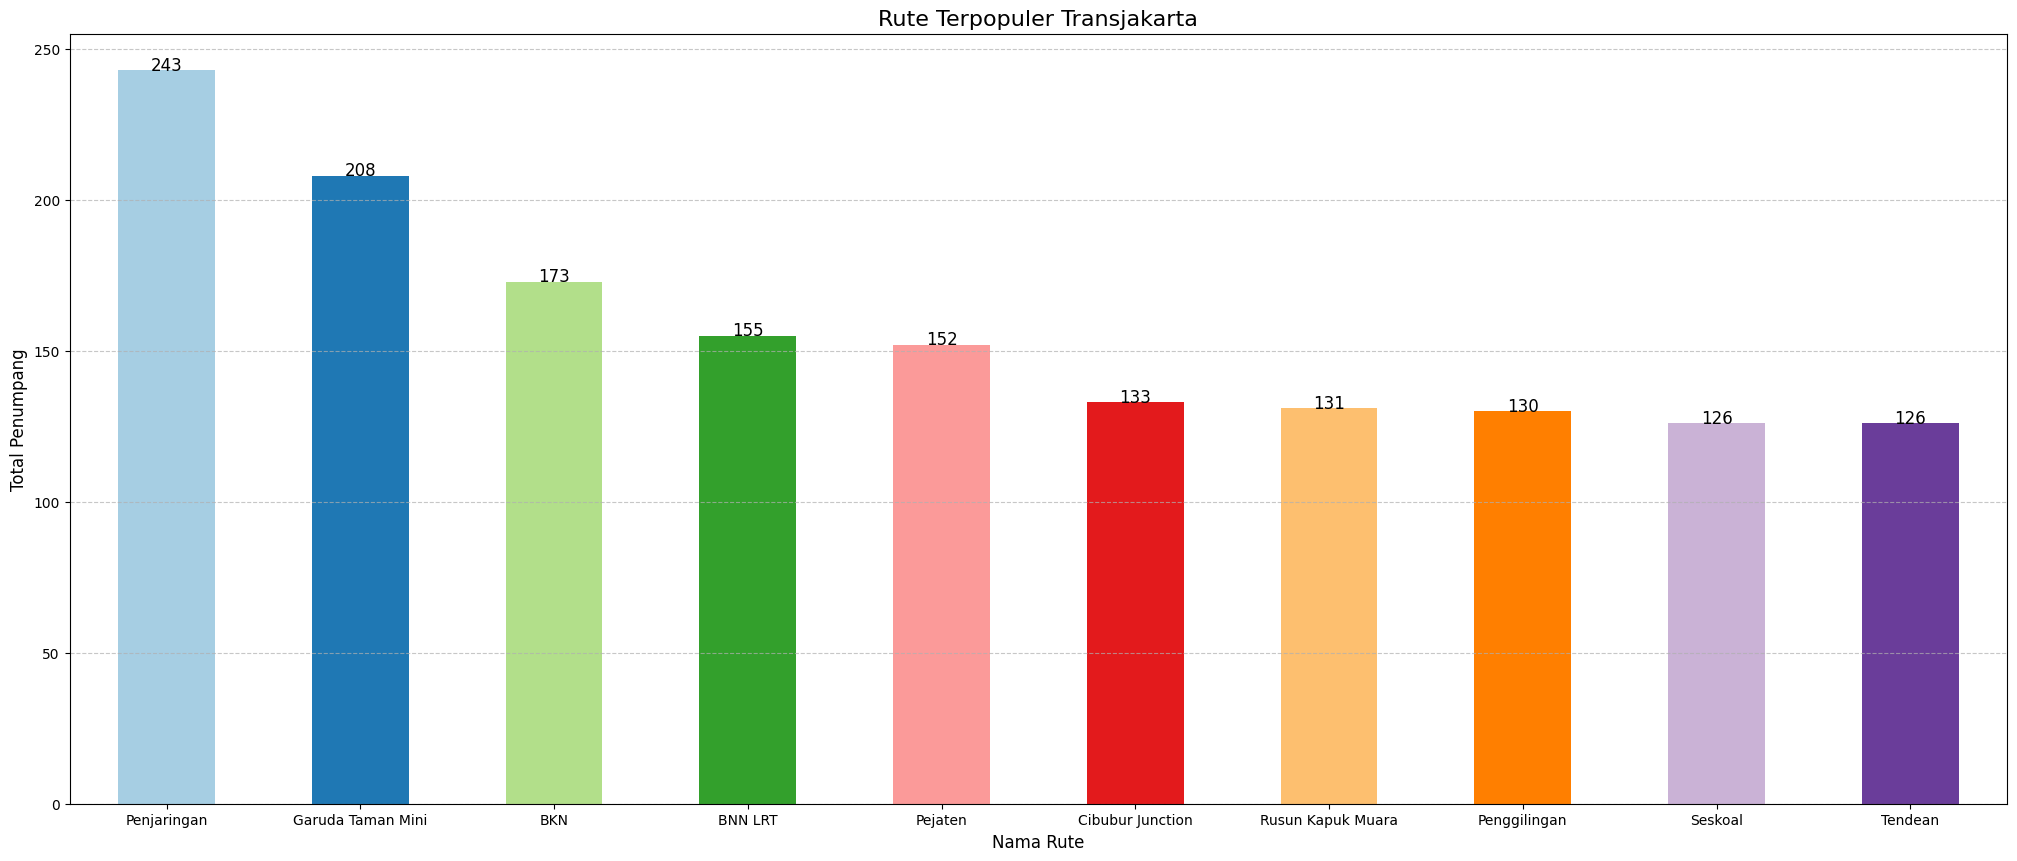

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(25,10))
bars = tapinstopsname_counts.plot(kind='bar', color=plt.cm.Paired(range(len(tapinstopsname_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Rute Terpopuler Transjakarta', fontsize=16)
plt.xlabel('Nama Rute', fontsize=12)
plt.ylabel('Total Penumpang', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('tapinstopsname_counts.png')
plt.show()

Rute awal/halte tempat awal penumpang Transjakarta memulai perjalanan. Rute awal terbanyak berada di rute Penjaringan

##### tapOutStopsName

Halte tempat penumpang Transjakarta melakukan tap keluar

In [ ]:
tapinstopsname_counts = data['tapOutStopsName'].value_counts().head(10)
tapinstopsname_counts

,count
tapOutStopsName,
BKN,1660
Penjaringan,265
Term. Senen,196
Monas,167
Term. Kampung Rambutan,164
Kejaksaan Agung,159
Ragunan,151
Pinang Ranti,146
Tendean,131


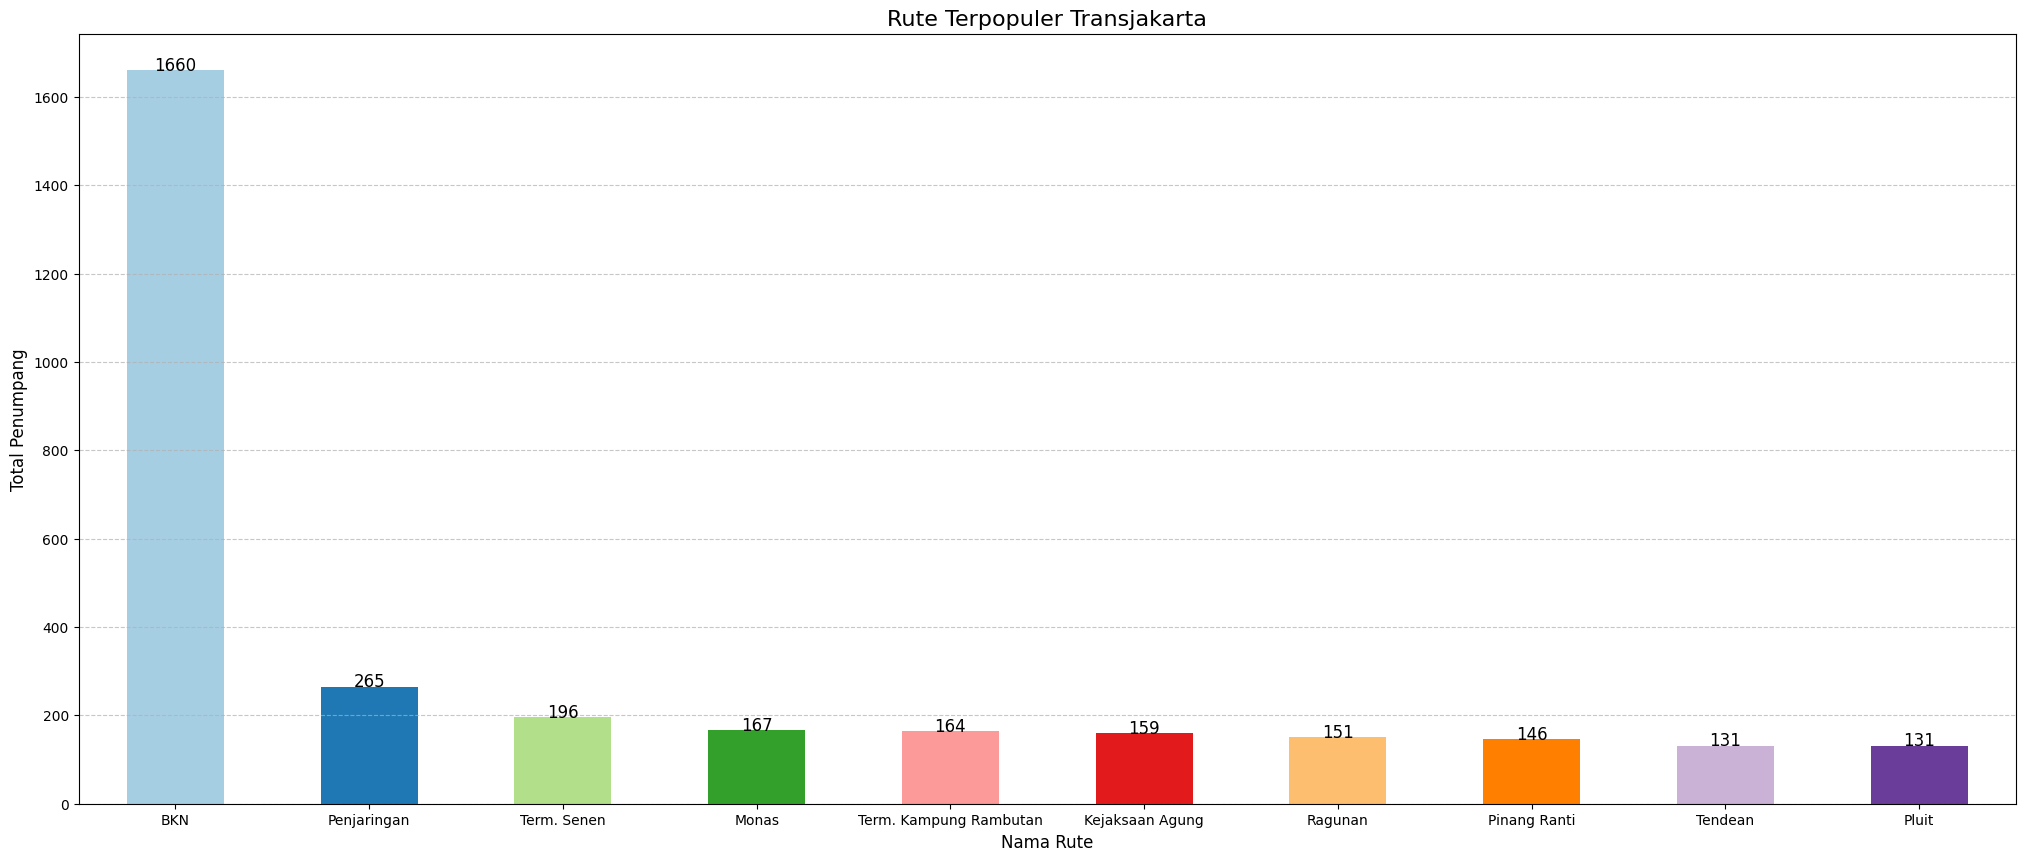

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(25,10))
bars = tapinstopsname_counts.plot(kind='bar', color=plt.cm.Paired(range(len(tapinstopsname_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Rute Terpopuler Transjakarta', fontsize=16)
plt.xlabel('Nama Rute', fontsize=12)
plt.ylabel('Total Penumpang', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('tapinstopsname_counts.png')
plt.show()

##### tapInTime dan tapOutTime

Melihat perbandingan tapInTime dan tapOutTime selama bulan April 2023

In [ ]:
data['tapInDate'] = data['tapInTime'].dt.date  # ambil tanggalnya saja
tapin_counts = data.groupby('tapInDate').size()  # hitung jumlah per hari
data['tapOutDate'] = data['tapOutTime'].dt.date
tapout_counts = data.groupby('tapOutDate').size()

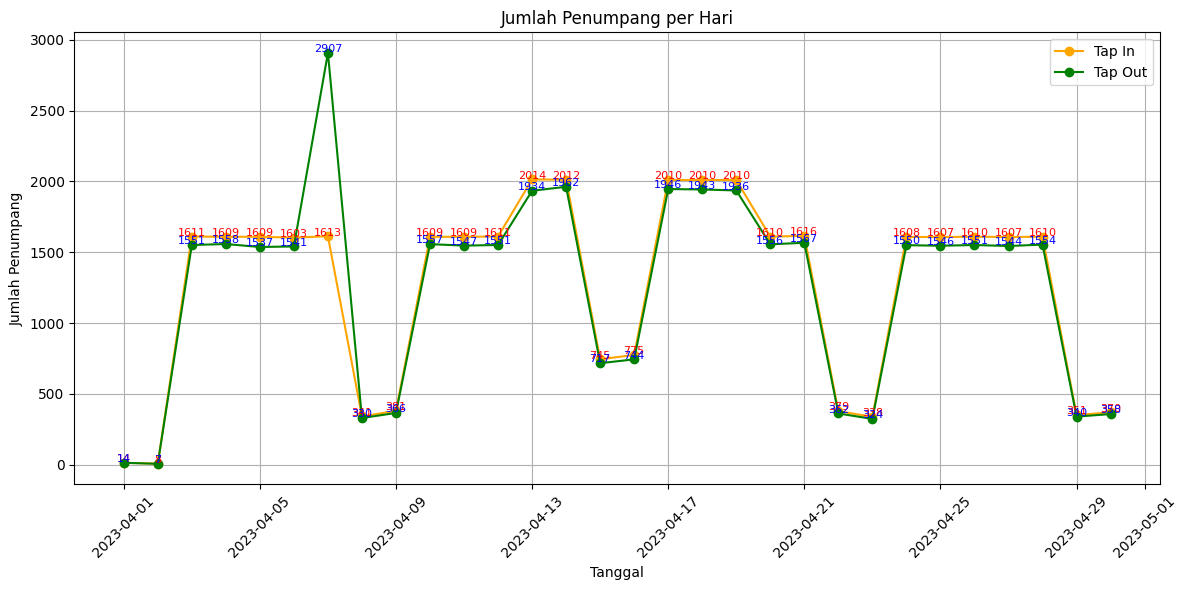

In [ ]:
plt.figure(figsize=(12, 6))

# Garis Tap In
plt.plot(tapin_counts.index, tapin_counts.values, label='Tap In', marker='o', linestyle='-', color='orange')

# Garis Tap Out
plt.plot(tapout_counts.index, tapout_counts.values, label='Tap Out', marker='o', linestyle='-', color='green')

# Tambahkan angka ke setiap titik
for x, y in zip(tapin_counts.index, tapin_counts.values):
  # plt.text itu untuk menambahkan angkanya, y + 5 itu buat menaikan angka di atas titik, ha = "center" untuk mempertegas posisi
    plt.text(x, y + 5, str(y), ha='center', fontsize=8, color='red')

for x, y in zip(tapout_counts.index, tapout_counts.values):
  # plt.text itu untuk menambahkan angkanya, y + 5 itu buat menaikan angka di atas titik, ha = "center" untuk mempertegas posisi
    plt.text(x, y + 5, str(y), ha='center', fontsize=8, color='blue')

# Tambahan judul
plt.title('Jumlah Penumpang per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Pola penumpang yang melakukan perjalanan memiliki pola yang hampir sama setiap harinya. Terdapat satu perbedaan yaitu antara tanggal 5 dan 9 April 2023 dimana lebih banyak penumpang melakukan tapOut pada di antara tanggal tersebut. Hal tersebut dapat dianalisis lebih lanjut terkait jam kepadatan penumpang

Melihat perbandingan penumpang pada 24 jam perhari

In [ ]:
data['tapInHour'] = data['tapInTime'].dt.hour
data['tapOutHour'] = data['tapOutTime'].dt.hour
tapin_hourly_counts = data.groupby('tapInHour').size()
tapout_hourly_counts = data.groupby('tapOutHour').size()

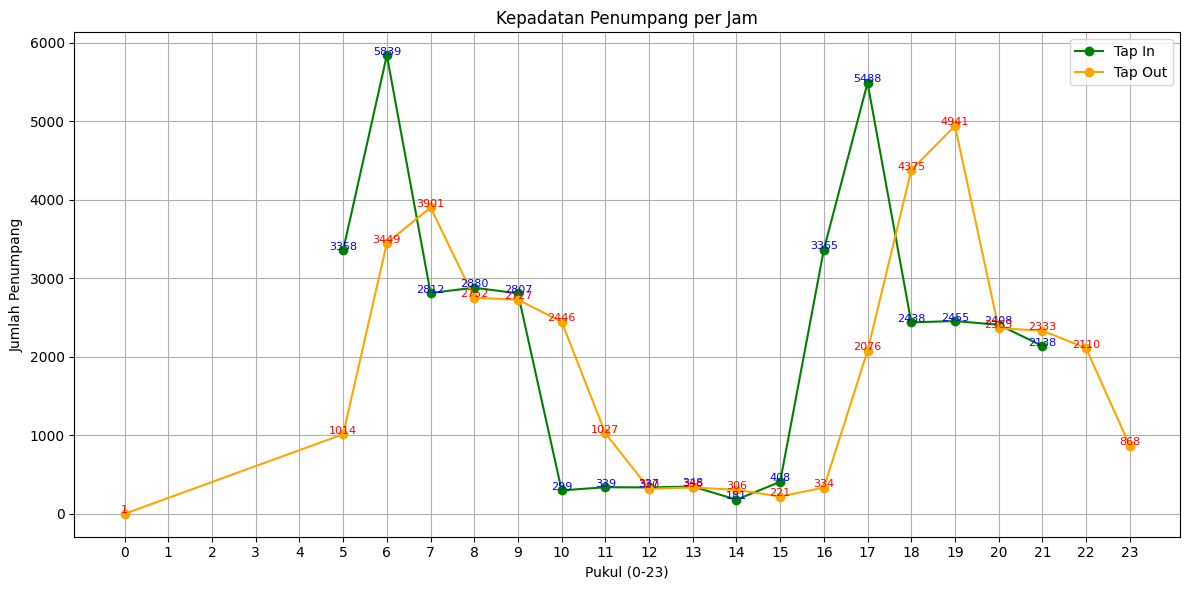

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(tapin_hourly_counts.index, tapin_hourly_counts.values, label='Tap In', marker='o', linestyle='-', color='green')
plt.plot(tapout_hourly_counts.index, tapout_hourly_counts.values, label='Tap Out', marker='o', linestyle='-', color='orange')

# Tambahkan angka ke setiap titik
for x, y in zip(tapin_hourly_counts.index, tapin_hourly_counts.values):
  # plt.text itu untuk menambahkan angkanya, y + 5 itu buat menaikan angka di atas titik, ha = "center" untuk mempertegas posisi
    plt.text(x, y + 5, str(y), ha='center', fontsize=8, color='blue')

for x, y in zip(tapout_hourly_counts.index, tapout_hourly_counts.values):
  # plt.text itu untuk menambahkan angkanya, y + 5 itu buat menaikan angka di atas titik, ha = "center" untuk mempertegas posisi
    plt.text(x, y + 5, str(y), ha='center', fontsize=8, color='red')



plt.title('Kepadatan Penumpang per Jam')
plt.xlabel('Pukul (0-23)')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0,24))  # Semua jam dari 0 sampai 23
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Penumpang terpadat mulai pukul 6 pagi dan 5 sore

Selanjutnya, melihat perbandingan hari dalam satu minggu untuk melihat kepadatan penumpang

In [ ]:
tapinday_counts = data['tapInDay'].value_counts()
tapinday_counts

,count
tapInDay,
Jumat,6851
Rabu,6840
Senin,6838
Selasa,6835
Kamis,6834
Minggu,1872
Sabtu,1830


Diasumsikan penumpang setiap harinya pulang-pergi, sehingga untuk plotnya menjadi satu

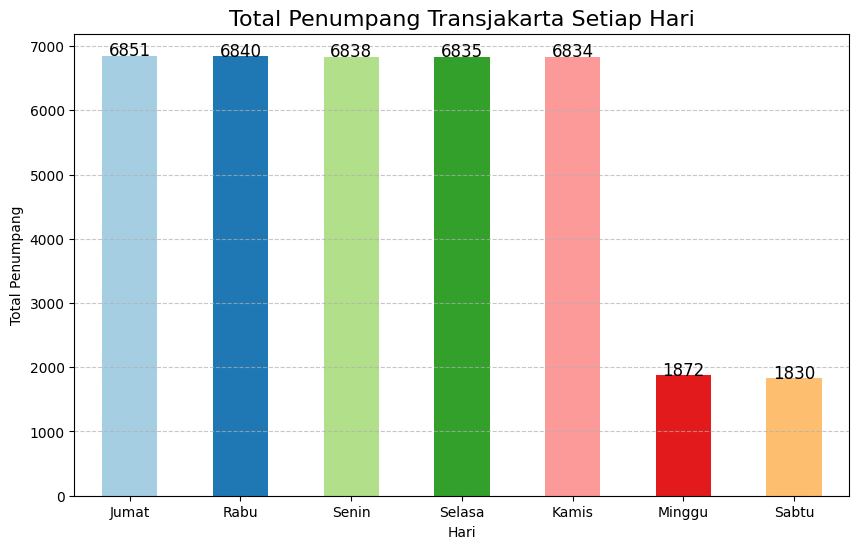

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = tapinday_counts.plot(kind='bar', color=plt.cm.Paired(range(len(tapinday_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Total Penumpang Transjakarta Setiap Hari', fontsize=16)
plt.xlabel('Hari', fontsize=10)
plt.ylabel('Total Penumpang', fontsize=10)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('tapinday_counts.png')
plt.show()

##### payAmount

In [ ]:
payamount_counts = data['payAmount'].value_counts().head()
payamount_counts

,count
payAmount,
3500.0,19510
0.0,16648
20000.0,1742


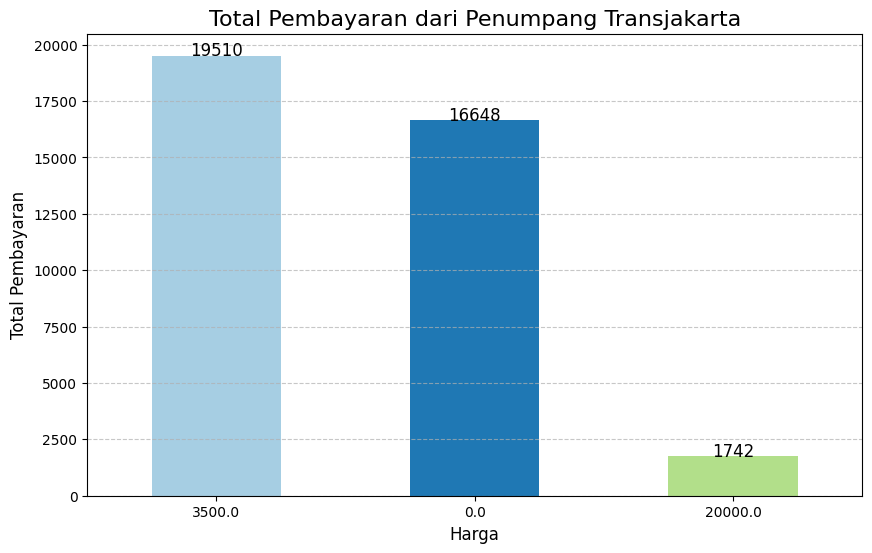

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = payamount_counts.plot(kind='bar', color=plt.cm.Paired(range(len(payamount_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Total Pembayaran dari Penumpang Transjakarta', fontsize=16)
plt.xlabel('Harga', fontsize=12)
plt.ylabel('Total Pembayaran', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('payamount_counts.png')
plt.show()

##### direction

In [ ]:
dirr_counts = data['direction'].value_counts()
dirr_counts

,count
direction,
1.0,18974
0.0,18926


0 untuk pergi, 1 untuk pulang (Arah)

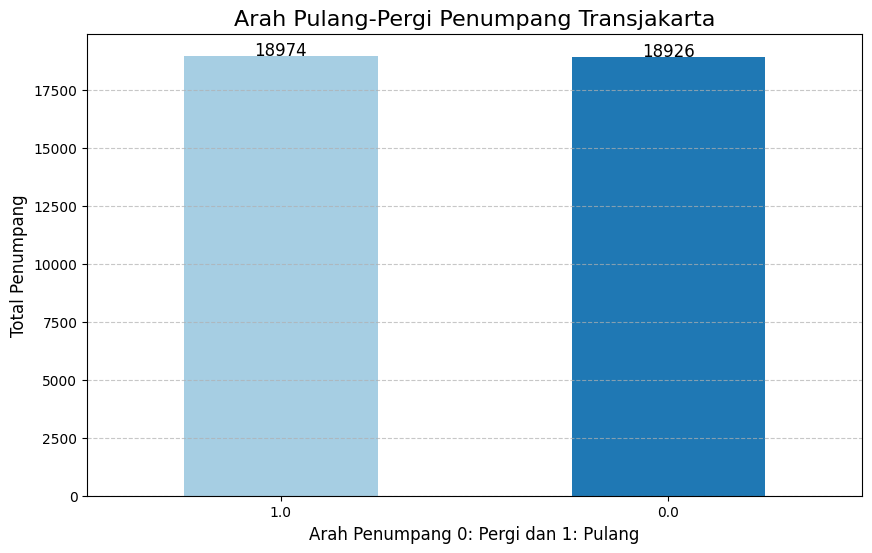

In [ ]:
# Create a bar chart with different colors for each bar
plt.figure(figsize=(10,6))
bars = dirr_counts.plot(kind='bar', color=plt.cm.Paired(range(len(dirr_counts))))

# Add values above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Text position
             f'{int(height)}', ha='center', fontsize=12)  # Number above the bar

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal lines (y-axis)
# You can also add vertical lines with `axis='x'`

# Add title and labels
plt.title('Arah Pulang-Pergi Penumpang Transjakarta', fontsize=16)
plt.xlabel('Arah Penumpang 0: Pergi dan 1: Pulang', fontsize=12)
plt.ylabel('Total Penumpang', fontsize=12)
plt.xticks(rotation=0)  # Rotate labels
plt.savefig('dirr_counts.png')
plt.show()

Penumpang yang pulang dan pergi hanya selisih sedikit untuk totalnya. Hal ini dapat disebabkan beberapa hal seperti faktor pribadi dimana lebih memilih transportasi lain untuk cepat sampai ke tujuan.

# KESIMPULAN

1. Metode Pembayaran
*   Metode pembayaran tertinggi menggunakan Bank DKI lalu diikuti oleh e-money

2. Gender
*   Penumpang Transjakarta didominasi oleh perempuan

3. Koridor dan Halte Terpadat
*   Koridor memiliki beberapa halte. Koridor paling banyak dikunjungi yaitu koridor Cibubur diikuti oleh Ciputat. Salah satu faktor koridor yang paling padat dikunjungi yaitu tempatnya strategis yang dilalui oleh rute-rute besar seperti Blok M.
*   Koridor yang dikunjungi oleh penumpang belum merata setiap tempat, hal ini dapat disebabkan oleh perbedaan padat penduduk antar-daerah.
*   Halte tempat penumpang melakukan tap masuk paling banyak dipegang oleh halte Penjaringan (salah satu wilayah padat penduduk) dan halte tujuan terbanyak dipegang oleh BKN (daerah kantor pemerintahan)

4. Peak Hour
*   Penumpang paling padat berada pada pukul 6 pagi dan pukul 5 sore
*   Weekdays (hari kerja) memiliki penumpang terbanyak pada hari Jum'at. Akan tetapi, jumlah penumpang dari hari Senin-Jumat memiliki jumlah yang hampir sama dan pada weekend, tidak terlalu padat penumpang.











# INSIGHT

**1. Penambahan Armada Bus**

Faktor yang mempengaruhi kepadatan penumpang dalam satu koridor dan halte salah satunya adalah jarak yang dekat dengan tempat tinggal. Penambahan armada bus, terutama di jam-jam tertentu sangat dibutuhkan.

*   Penambahan armada bus Transjakarta dapat dijadikan sebagai prioritas utama dalam upaya meningkatkan kenyamanan penumpang. Terutama di weekdays (Senin-Jumat) pada pukul 6-7 pagi serta 5-6 sore memerlukan ekstra bus untuk dinaiki penumpang

**2. Transjakarta Pink**

Penumpang perempuan lebih banyak dibandingkan penumpang laki-laki. Manajemen Transjakarta dapat mengupayakan lebih penambahan bus prioritas untuk perempuan.

*   Penumpang Transjakarta sebagian besar berjenis kelamin perempuan. Penambahan Transjakarta Pink juga dapat menjadi upaya manajemen untuk meningkatkan kenyamanan penumpang perempuan, terutama untuk mengurangi pelecehan seksual.
*   Penambahan Transjakarta Pink diberlakukan untuk seluruh rute terutama di peak hour.

**3. Peningkatan Fasilitas**
*   Koridor yang ramai, seperti Cibubur-Balai Kota, dapat diberikan fasilitas tambahan seperti kursi duduk, kanopi, dan vanding machine untuk penumpang yang menunggu bus dapat membeli minuman terlebih disaat cuaca panas.
*   Manajemen Transjakarta juga dapat memfokuskan keteraturan waktu untuk Transjakarta beroperasi setiap jam-nya. Jadwal kedatangan Transjakarta dapat diatur ulang untuk menghindari isi bus yang overload.








In [ ]:
data.to_csv('data_transjakarta.csv', index=False)